# Quantile Hedging

##  Przemysław Adamski, Michał Dąbrowski, Wiktor Jacaszek

## Przypadek $\mu - r < \sigma^2$

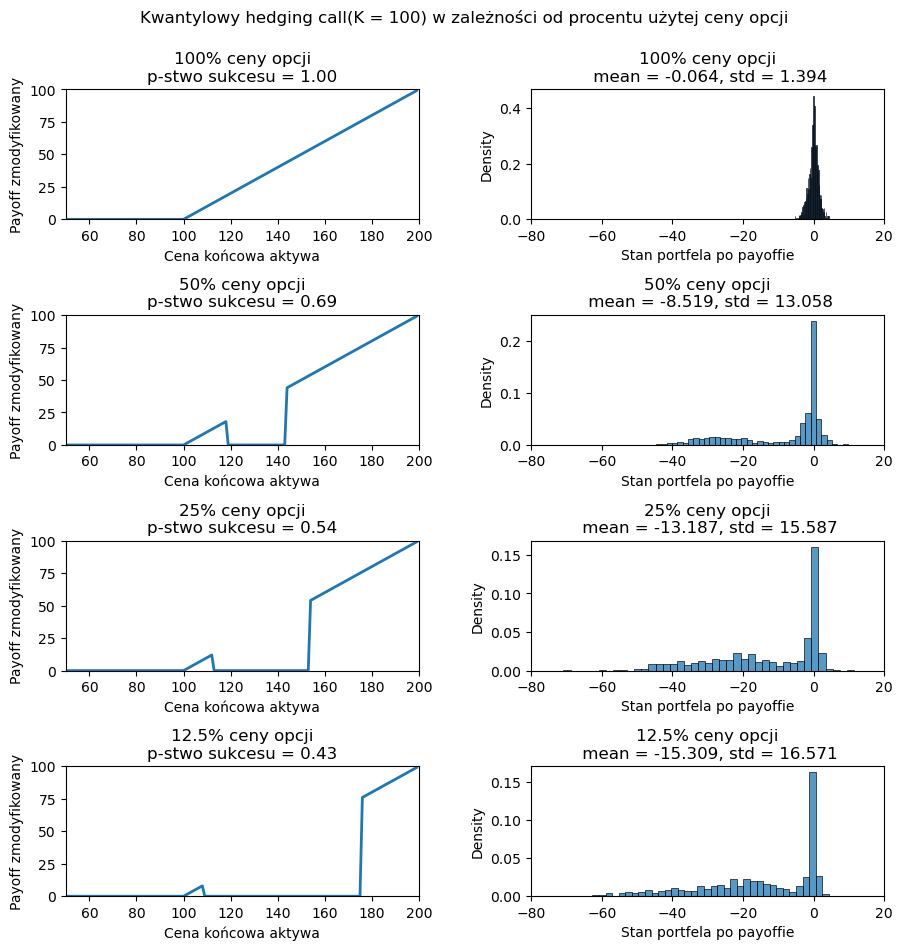

In [16]:
fig, axs = plt.subplots(4, 2, figsize = (10, 10))
fig.tight_layout(pad=5.0)
plt.subplots_adjust(top=0.9)
plt.suptitle(f'Kwantylowy hedging call(K = {K}) w zależności od procentu użytej ceny opcji')
sb.histplot(money_time_call_1.iloc[:,-1], ax = axs[0, 1], bins = 50, stat = 'density').set(xlim = [np.min(money_time_call_1.iloc[:,-1]) - 5, np.max(money_time_call_1.iloc[:,-1]) + 5], title = f'100% ceny opcji\n mean = {money_time_call_1.iloc[:,-1].mean():.3f}, std = {money_time_call_1.iloc[:,-1].std():.3f}')
sb.histplot(money_time_call_2.iloc[:,-1], ax = axs[1, 1], bins = 50, stat = 'density').set(xlim = [np.min(money_time_call_2.iloc[:,-1]) - 5, np.max(money_time_call_2.iloc[:,-1]) + 5], title = f'50% ceny opcji\n mean = {money_time_call_2.iloc[:,-1].mean():.3f}, std = {money_time_call_2.iloc[:,-1].std():.3f}')
sb.histplot(money_time_call_3.iloc[:,-1], ax = axs[2, 1], bins = 50, stat = 'density').set(xlim = [np.min(money_time_call_3.iloc[:,-1]) - 5, np.max(money_time_call_3.iloc[:,-1]) + 5], title = f'25% ceny opcji\n mean = {money_time_call_3.iloc[:,-1].mean():.3f}, std = {money_time_call_3.iloc[:,-1].std():.3f}')
sb.histplot(money_time_call_4.iloc[:,-1], ax = axs[3, 1], bins = 50, stat = 'density').set(xlim = [np.min(money_time_call_4.iloc[:,-1]) - 5, np.max(money_time_call_4.iloc[:,-1]) + 5], title = f'12.5% ceny opcji\n mean = {money_time_call_4.iloc[:,-1].mean():.3f}, std = {money_time_call_4.iloc[:,-1].std():.3f}')
axs[0, 0].plot(np.arange(50, 200), payoff_1, lw = 2)
axs[0, 0].set_title(f'100% ceny opcji\np-stwo sukcesu = {prob_1:.2f}')
axs[1, 0].plot(np.arange(50, 200), payoff_2, lw = 2)
axs[1, 0].set_title(f'50% ceny opcji\np-stwo sukcesu = {prob_2:.2f}')
axs[2, 0].plot(np.arange(50, 200), payoff_3, lw = 2)
axs[2, 0].set_title(f'25% ceny opcji\np-stwo sukcesu = {prob_3:.2f}')
axs[3, 0].plot(np.arange(50, 200), payoff_4, lw = 2)
axs[3, 0].set_title(f'12.5% ceny opcji\np-stwo sukcesu = {prob_4:.2f}')
for i in range(4):
    axs[i, 0].set_xlim([50, 200])
    axs[i, 0].set_xlabel('Cena końcowa aktywa')
    axs[i, 0].set_ylabel('Payoff zmodyfikowany')
    axs[i, 1].set_xlim([-80, 20])
    axs[i, 0].set_ylim([0, 100])
    axs[i, 1].set_xlabel('Stan portfela po payoffie')

Text(0.5, 0.98, 'Kwantylowy hedging call(K = 100) przy użyciu połowy ceny opcji, czyli z V0 = 5.23')

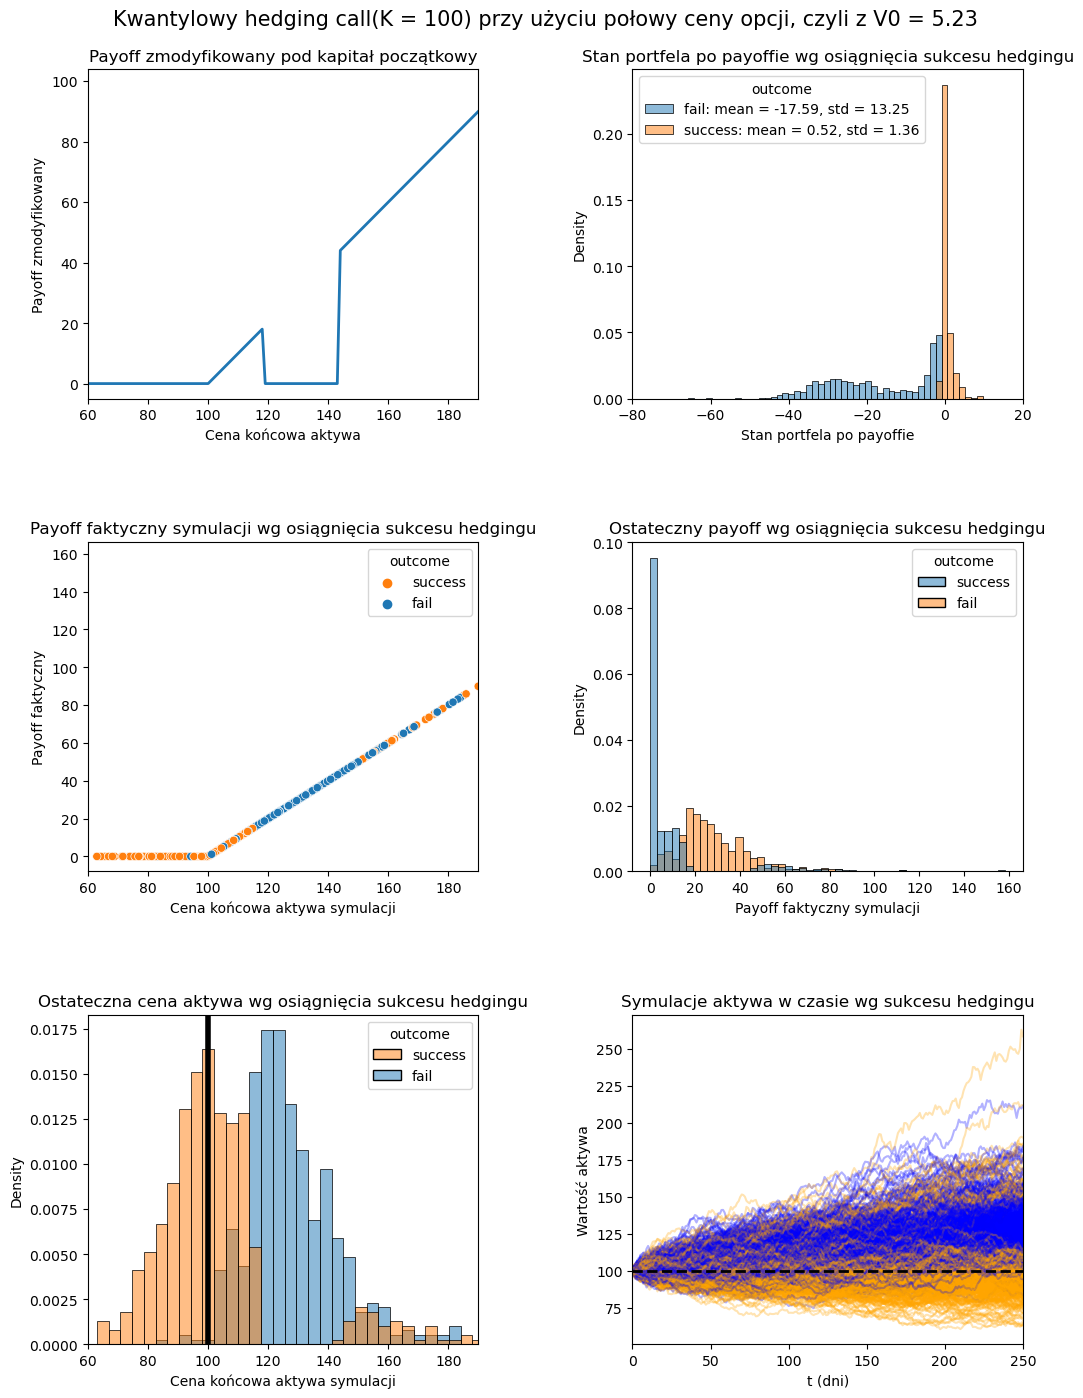

In [17]:
fig, axs = plt.subplots(3, 2, figsize = (12, 15))
fig.tight_layout(pad=8)
plt.subplots_adjust(top=0.94)
axs[0, 0].plot(np.arange(50, 200), payoff_2, lw = 2)
axs[0, 0].set_title(f'Payoff zmodyfikowany pod kapitał początkowy')
axs[0, 0].set_xlim([60, 190])
axs[0, 0].set_xlabel('Cena końcowa aktywa')
axs[0, 0].set_ylabel('Payoff zmodyfikowany')
money_time_call_outcome = money_time_call_2.copy()
money_time_call_outcome['outcome'] = money_time_call_2.apply(lambda row: 'success' if row.iloc[-1] >= - 0.1 * BS_price_call else 'fail', axis = 1)
sb.scatterplot(ax = axs[1, 0], x = (X0*reality).iloc[:,-1], y = np.maximum((X0*reality)[underlying.values_per_year * T] - K,0), hue = money_time_call_outcome['outcome'], palette = {'success':'tab:orange', 'fail':'tab:blue'}).set_title('Payoff faktyczny symulacji wg osiągnięcia sukcesu hedgingu')
axs[1, 0].set_xlim([60, 190])
axs[1, 0].set_xlabel('Cena końcowa aktywa symulacji')
axs[1, 0].set_ylabel('Payoff faktyczny')
sb.histplot(ax = axs[2, 0], x = (X0*reality)[underlying.values_per_year * T], bins = 50, stat = 'density', hue = money_time_call_outcome['outcome'], palette = {'success':'tab:orange', 'fail':'tab:blue'}).set_title('Ostateczna cena aktywa wg osiągnięcia sukcesu hedgingu')
axs[2, 0].axvline(K, color = 'black', lw = 4)
axs[2, 0].set_xlim([60, 190])
axs[2, 0].set_xlabel('Cena końcowa aktywa symulacji')
stats = money_time_call_outcome.loc[:,[underlying.values_per_year * vanilla_call.T, 'outcome']].groupby('outcome').agg(mean = (underlying.values_per_year * vanilla_call.T, 'mean'), std = (underlying.values_per_year * vanilla_call.T, 'std'))
sb.histplot(x = money_time_call_2.iloc[:,-1], ax = axs[0, 1], bins = 50, legend = False, hue = money_time_call_outcome['outcome'], palette = {'success':'tab:orange', 'fail':'tab:blue'}, stat = 'density').set(xlim = [np.min(money_time_call_2.iloc[:,-1]) - 5, np.max(money_time_call_2.iloc[:,-1]) + 5], title = f'Stan portfela po payoffie wg osiągnięcia sukcesu hedgingu')
axs[0, 1].legend(title='outcome', loc='upper left', labels=[f"fail: mean = {stats.loc['fail','mean']:.2f}, std = {stats.loc['fail','std']:.2f}", f"success: mean = {stats.loc['success','mean']:.2f}, std = {stats.loc['success','std']:.2f}"])
axs[0, 1].set_xlim([-80, 20])
axs[0, 1].set_xlabel('Stan portfela po payoffie')
sb.histplot(ax = axs[1,1], x = np.maximum((X0*reality)[underlying.values_per_year * T] - K,0), hue = money_time_call_outcome['outcome'], bins = 50, stat = 'density').set_title('Ostateczny payoff wg osiągnięcia sukcesu hedgingu')
(X0*reality).T.plot.line(ax = axs[2,1], alpha = 0.3, legend = False, color = money_time_call_outcome.apply(lambda row: 'orange' if row['outcome'] == 'success' else 'blue', axis = 1), title = 'Symulacje aktywa w czasie wg sukcesu hedgingu')
axs[1, 1].set_xlabel('Payoff faktyczny symulacji')
axs[2,1].set_xlim([0,values_per_year])
axs[2,1].axhline(y=K, xmin=0, xmax=249, color='black', linestyle='--', lw=2)
axs[2,1].set_xlabel('t (dni)')
axs[2,1].set_ylabel('Wartość aktywa')
plt.suptitle(f'Kwantylowy hedging call(K = {K}) przy użyciu połowy ceny opcji, czyli z V0 = {BS_price_call/2:.2f}', size = 15)

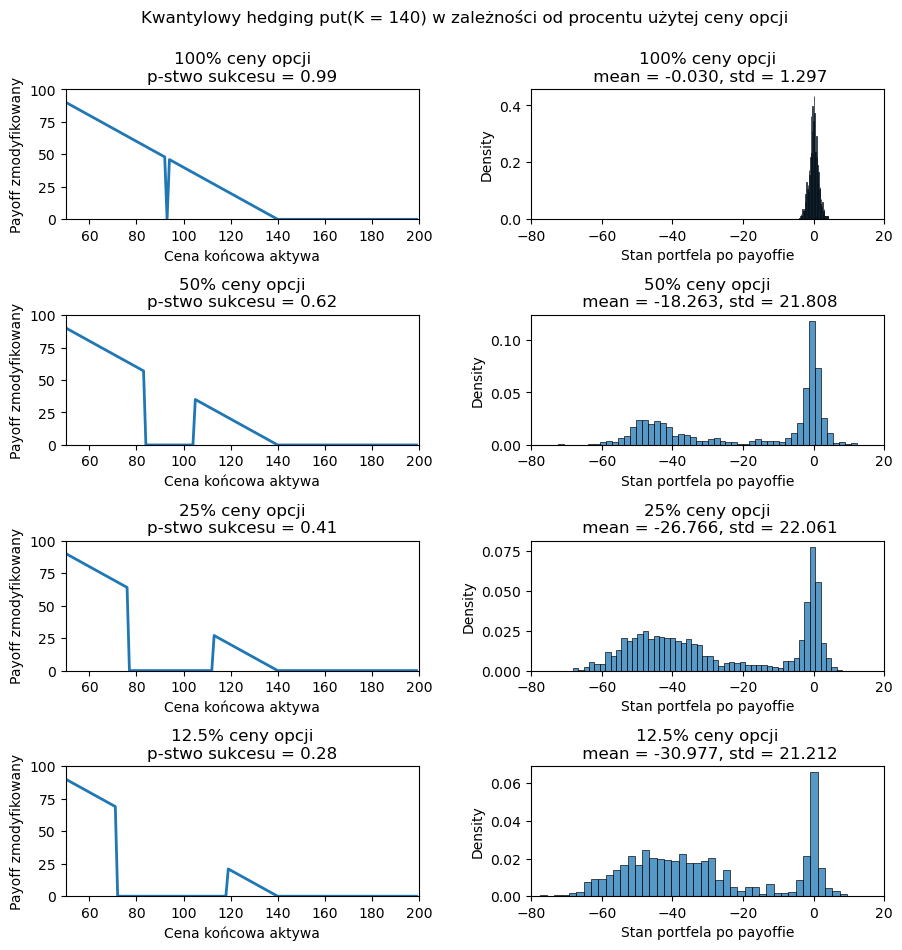

In [31]:
fig, axs = plt.subplots(4, 2, figsize = (10, 10))
fig.tight_layout(pad=5.0)
plt.subplots_adjust(top=0.9)
plt.suptitle(f'Kwantylowy hedging put(K = {K}) w zależności od procentu użytej ceny opcji')
sb.histplot(money_time_put_1.iloc[:,-1], ax = axs[0, 1], bins = 50, stat = 'density').set(xlim = [np.min(money_time_put_1.iloc[:,-1]) - 5, np.max(money_time_put_1.iloc[:,-1]) + 5], title = f'100% ceny opcji\n mean = {money_time_put_1.iloc[:,-1].mean():.3f}, std = {money_time_put_1.iloc[:,-1].std():.3f}')
sb.histplot(money_time_put_2.iloc[:,-1], ax = axs[1, 1], bins = 50, stat = 'density').set(xlim = [np.min(money_time_put_2.iloc[:,-1]) - 5, np.max(money_time_put_2.iloc[:,-1]) + 5], title = f'50% ceny opcji\n mean = {money_time_put_2.iloc[:,-1].mean():.3f}, std = {money_time_put_2.iloc[:,-1].std():.3f}')
sb.histplot(money_time_put_3.iloc[:,-1], ax = axs[2, 1], bins = 50, stat = 'density').set(xlim = [np.min(money_time_put_3.iloc[:,-1]) - 5, np.max(money_time_put_3.iloc[:,-1]) + 5], title = f'25% ceny opcji\n mean = {money_time_put_3.iloc[:,-1].mean():.3f}, std = {money_time_put_3.iloc[:,-1].std():.3f}')
sb.histplot(money_time_put_4.iloc[:,-1], ax = axs[3, 1], bins = 50, stat = 'density').set(xlim = [np.min(money_time_put_4.iloc[:,-1]) - 5, np.max(money_time_put_4.iloc[:,-1]) + 5], title = f'12.5% ceny opcji\n mean = {money_time_put_4.iloc[:,-1].mean():.3f}, std = {money_time_put_4.iloc[:,-1].std():.3f}')
axs[0, 0].plot(np.arange(50, 200), payoff_1, lw = 2)
axs[0, 0].set_title(f'100% ceny opcji\np-stwo sukcesu = {prob_1:.2f}')
axs[1, 0].plot(np.arange(50, 200), payoff_2, lw = 2)
axs[1, 0].set_title(f'50% ceny opcji\np-stwo sukcesu = {prob_2:.2f}')
axs[2, 0].plot(np.arange(50, 200), payoff_3, lw = 2)
axs[2, 0].set_title(f'25% ceny opcji\np-stwo sukcesu = {prob_3:.2f}')
axs[3, 0].plot(np.arange(50, 200), payoff_4, lw = 2)
axs[3, 0].set_title(f'12.5% ceny opcji\np-stwo sukcesu = {prob_4:.2f}')
for i in range(4):
    axs[i, 0].set_xlim([50, 200])
    axs[i, 0].set_xlabel('Cena końcowa aktywa')
    axs[i, 0].set_ylabel('Payoff zmodyfikowany')
    axs[i, 1].set_xlim([-80, 20])
    axs[i, 0].set_ylim([0, 100])
    axs[i, 1].set_xlabel('Stan portfela po payoffie')

Text(0.5, 0.98, 'Kwantylowy hedging put(K = 140) przy użyciu połowy ceny opcji, czyli z V0 = 16.98')

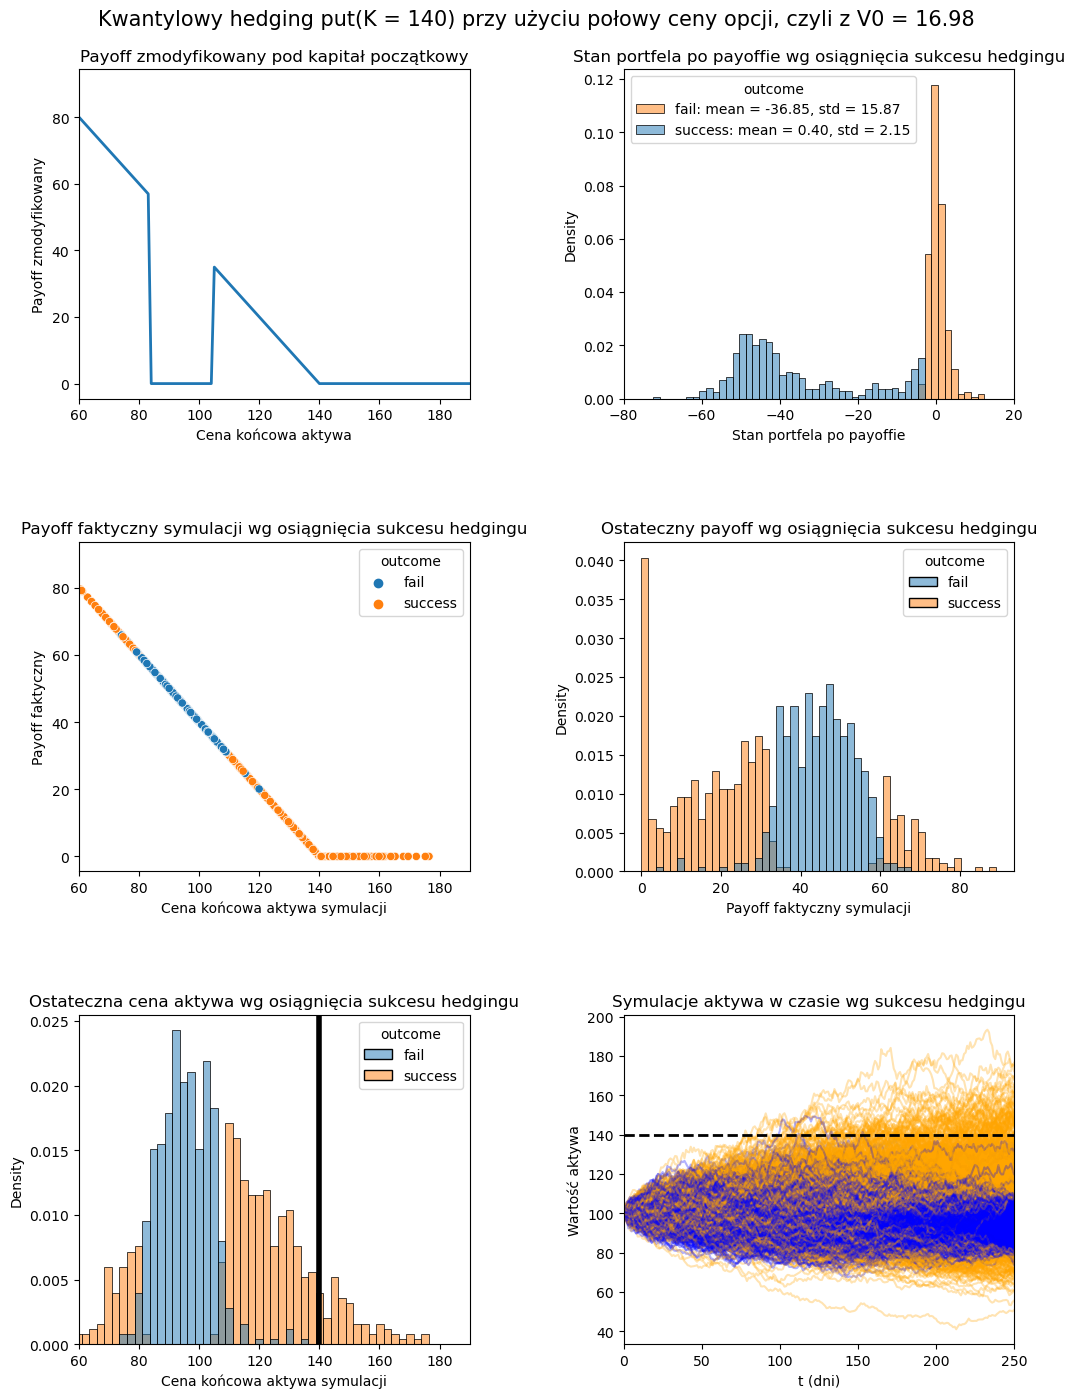

In [32]:
fig, axs = plt.subplots(3, 2, figsize = (12, 15))
fig.tight_layout(pad=8)
plt.subplots_adjust(top=0.94)
axs[0, 0].plot(np.arange(50, 200), payoff_2, lw = 2)
axs[0, 0].set_title(f'Payoff zmodyfikowany pod kapitał początkowy')
axs[0, 0].set_xlim([60, 190])
axs[0, 0].set_xlabel('Cena końcowa aktywa')
axs[0, 0].set_ylabel('Payoff zmodyfikowany')
money_time_put_outcome = money_time_put_2.copy()
money_time_put_outcome['outcome'] = money_time_put_2.apply(lambda row: 'success' if row.iloc[-1] >= - 0.1 * BS_price_put else 'fail', axis = 1)
sb.scatterplot(ax = axs[1, 0], x = (X0*reality).iloc[:,-1], y = np.maximum(K - (X0*reality)[underlying.values_per_year * T],0), hue = money_time_put_outcome['outcome'], palette = {'success':'tab:orange', 'fail':'tab:blue'}).set_title('Payoff faktyczny symulacji wg osiągnięcia sukcesu hedgingu')
axs[1, 0].set_xlim([60, 190])
axs[1, 0].set_xlabel('Cena końcowa aktywa symulacji')
axs[1, 0].set_ylabel('Payoff faktyczny')
sb.histplot(ax = axs[2, 0], x = (X0*reality)[underlying.values_per_year * T], bins = 50, stat = 'density', hue = money_time_put_outcome['outcome'], palette = {'success':'tab:orange', 'fail':'tab:blue'}).set_title('Ostateczna cena aktywa wg osiągnięcia sukcesu hedgingu')
axs[2, 0].axvline(K, color = 'black', lw = 4)
axs[2, 0].set_xlim([60, 190])
axs[2, 0].set_xlabel('Cena końcowa aktywa symulacji')
stats = money_time_put_outcome.loc[:,[underlying.values_per_year * vanilla_put.T, 'outcome']].groupby('outcome').agg(mean = (underlying.values_per_year * vanilla_put.T, 'mean'), std = (underlying.values_per_year * vanilla_put.T, 'std'))
sb.histplot(x = money_time_put_2.iloc[:,-1], ax = axs[0, 1], bins = 50, legend = False, hue = money_time_put_outcome['outcome'], palette = {'success':'tab:orange', 'fail':'tab:blue'}, stat = 'density').set(xlim = [np.min(money_time_put_2.iloc[:,-1]) - 5, np.max(money_time_put_2.iloc[:,-1]) + 5], title = f'Stan portfela po payoffie wg osiągnięcia sukcesu hedgingu')
axs[0, 1].legend(title='outcome', loc='upper left', labels=[f"fail: mean = {stats.loc['fail','mean']:.2f}, std = {stats.loc['fail','std']:.2f}", f"success: mean = {stats.loc['success','mean']:.2f}, std = {stats.loc['success','std']:.2f}"])
axs[0, 1].set_xlim([-80, 20])
axs[0, 1].set_xlabel('Stan portfela po payoffie')
sb.histplot(ax = axs[1,1], x = np.maximum(K - (X0*reality)[underlying.values_per_year * T],0), hue = money_time_put_outcome['outcome'], bins = 50, stat = 'density').set_title('Ostateczny payoff wg osiągnięcia sukcesu hedgingu')
(X0*reality).T.plot.line(ax = axs[2,1], alpha = 0.3, legend = False, color = money_time_put_outcome.apply(lambda row: 'orange' if row['outcome'] == 'success' else 'blue', axis = 1), title = 'Symulacje aktywa w czasie wg sukcesu hedgingu')
axs[1, 1].set_xlabel('Payoff faktyczny symulacji')
axs[2,1].set_xlim([0,values_per_year])
axs[2,1].axhline(y=K, xmin=0, xmax=249, color='black', linestyle='--', lw=2)
axs[2,1].set_xlabel('t (dni)')
axs[2,1].set_ylabel('Wartość aktywa')
plt.suptitle(f'Kwantylowy hedging put(K = {K}) przy użyciu połowy ceny opcji, czyli z V0 = {BS_price_put/2:.2f}', size = 15)

In [2]:
from option import Option, Vanilla, Vanilla_on_NonTraded
from trader import Trader

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sb
from tqdm import tqdm
from quantile_hedging_calculator import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython import display
from time import sleep
from multiprocess import Pool
from scipy.stats import norm
from scipy.stats import lognorm
import scipy.integrate as integrate
from scipy.optimize import root_scalar

## Analiza wrażliwości

8it [00:02,  3.68it/s]


Text(0.5, 0.98, 'Kwantylowy hedging na callu używając połowy ceny w zależności od ceny wykonania K\nzmodyfikowany payoff')

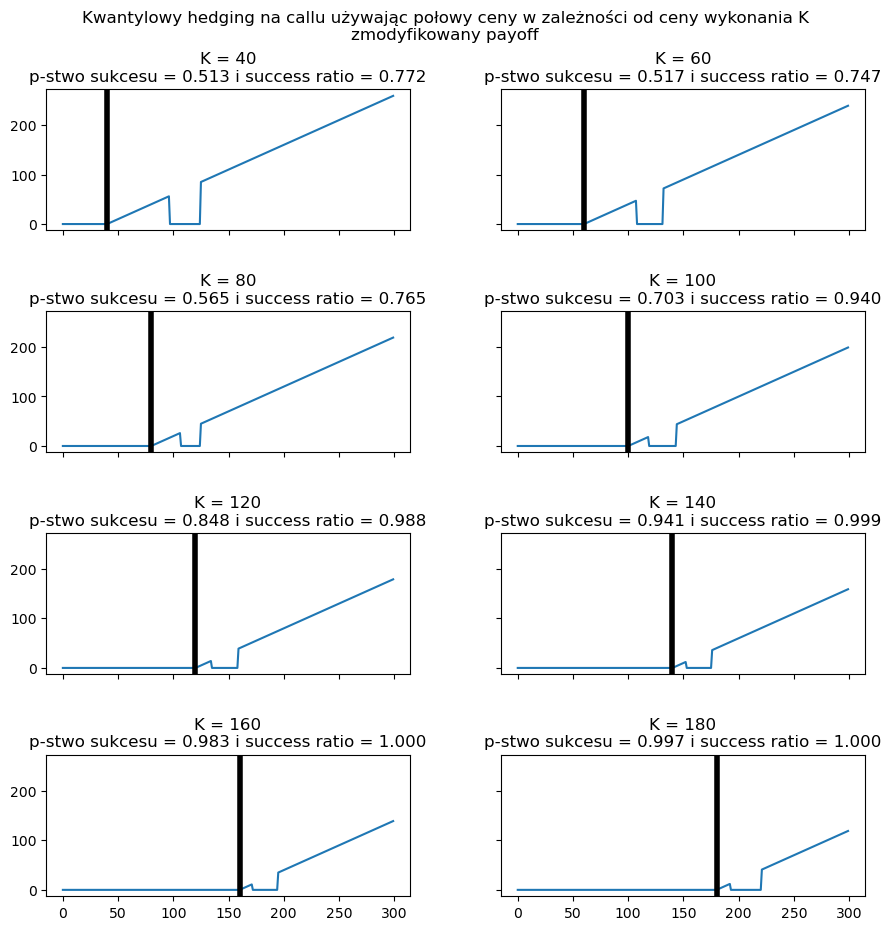

In [35]:
Ks = [40, 60, 80, 100, 120, 140, 160, 180]
X = pd.DataFrame(np.arange(0,300))
fig, axs = plt.subplots(4, 2, figsize=(10,10), sharex = True, sharey = True)
fig.tight_layout(pad=5.0)
for num, K in tqdm(enumerate(Ks)):
    vanilla_call = Vanilla(underlying, K, T, True)
    BS_price = vanilla_call.get_price(X0, 0)
    V0 = 0.5 * BS_price
    payoff_func, objective_func, c = payoff_from_v0(vanilla_call, V0, X0)
    axs[num//2, num%2].plot(X, payoff_func(X))
    axs[num//2, num%2].set_title(f'K = {K}\np-stwo sukcesu = {objective_func[0]:.3f} i success ratio = {objective_func[1]:.3f}')
    axs[num//2, num%2].axvline(K, color = 'black', lw = 4)
plt.subplots_adjust(top=0.9)
plt.suptitle('Kwantylowy hedging na callu używając połowy ceny w zależności od ceny wykonania K\nzmodyfikowany payoff', size = 12)

8it [00:02,  3.61it/s]


Text(0.5, 0.98, 'Kwantylowy hedging na callu(K = 100) w zależności od procenta użytej ceny\nzmodyfikowany payoff')

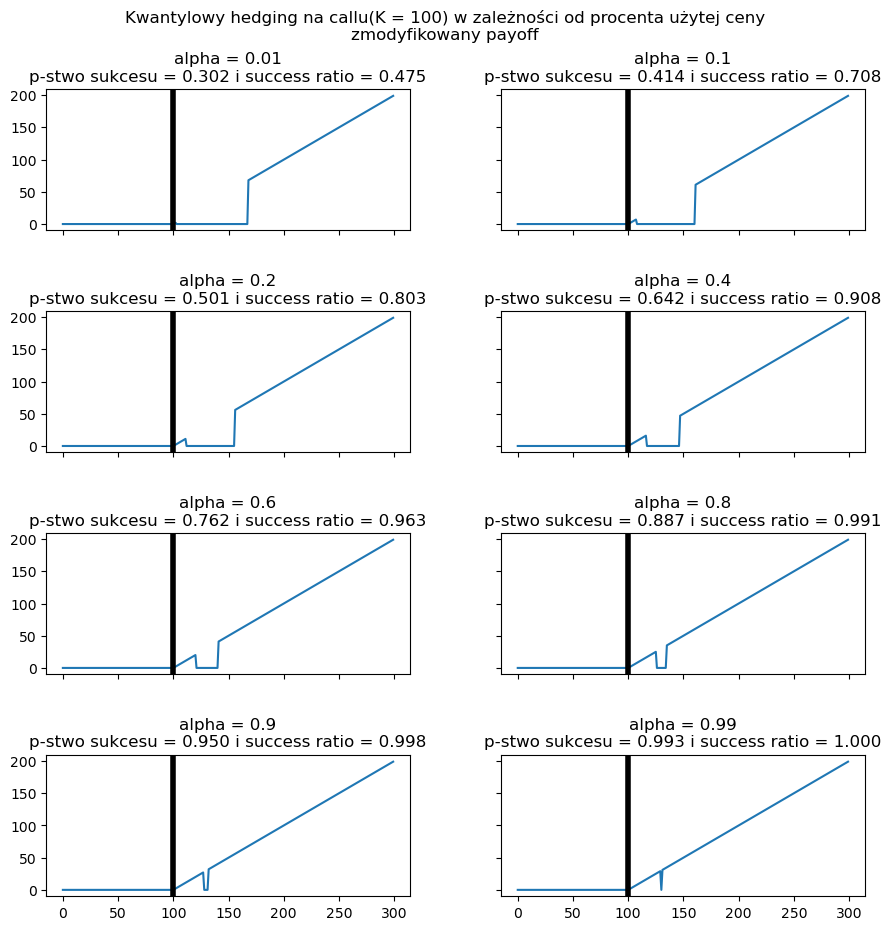

In [36]:
K = 100
alphas = [0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 0.9, 0.99]
X = pd.DataFrame(np.arange(0,300))
fig, axs = plt.subplots(4, 2, figsize=(10,10), sharex = True, sharey = True)
fig.tight_layout(pad=5.0)
for num, alpha in tqdm(enumerate(alphas)):
    vanilla_call = Vanilla(underlying, K, T, True)
    BS_price = vanilla_call.get_price(X0, 0)
    V0 = alpha * BS_price
    payoff_func, objective_func, _ = payoff_from_v0(vanilla_call, V0, X0)
    axs[num//2, num%2].plot(X, payoff_func(X))
    axs[num//2, num%2].set_title(f'alpha = {alpha}\np-stwo sukcesu = {objective_func[0]:.3f} i success ratio = {objective_func[1]:.3f}')
    axs[num//2, num%2].axvline(K, color = 'black', lw = 4)
plt.subplots_adjust(top=0.9)
plt.suptitle(f'Kwantylowy hedging na callu(K = {K}) w zależności od procenta użytej ceny\nzmodyfikowany payoff', size = 12)

8it [00:02,  3.54it/s]


Text(0.5, 0.98, 'Kwantylowy hedging na callu(K = 100) używając połowy ceny w zależności od zmienności aktywa\nzmodyfikowany payoff')

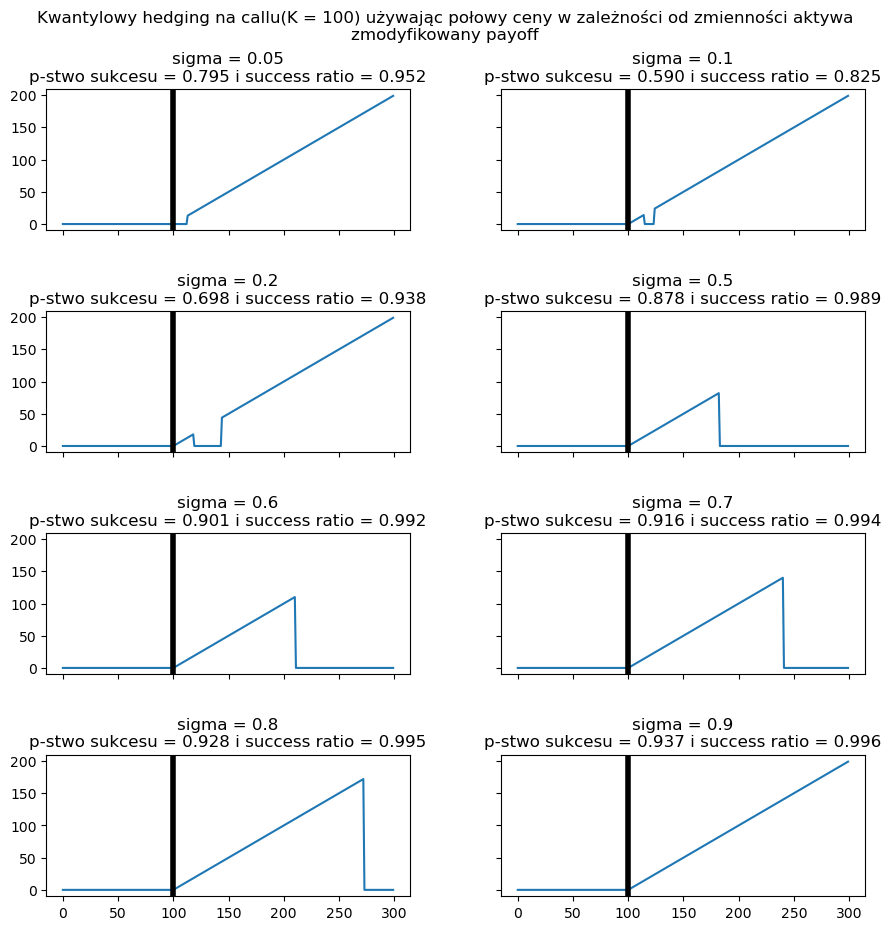

In [37]:
K = 100
sigmas = [0.05, 0.1, 0.2, 0.5, 0.6, 0.7, 0.8, 0.9]
X = pd.DataFrame(np.arange(0,300))
fig, axs = plt.subplots(4, 2, figsize=(10,10), sharex = True, sharey = True)
fig.tight_layout(pad=5.0)
for num, s in tqdm(enumerate(sigmas)):
    underlying = Underlying(mu, s, r, values_per_year)    
    vanilla_call = Vanilla(underlying, K, T, True)
    BS_price = vanilla_call.get_price(X0, 0)
    V0 = 0.5 * BS_price
    payoff_func, objective_func, _ = payoff_from_v0(vanilla_call, V0, X0)
    axs[num//2, num%2].plot(X, payoff_func(X))
    axs[num//2, num%2].set_title(f'sigma = {s}\np-stwo sukcesu = {objective_func[0]:.3f} i success ratio = {objective_func[1]:.3f}')
    axs[num//2, num%2].axvline(K, color = 'black', lw = 4)
plt.subplots_adjust(top=0.9)
plt.suptitle(f'Kwantylowy hedging na callu(K = {K}) używając połowy ceny w zależności od zmienności aktywa\nzmodyfikowany payoff', size = 12)

4it [00:57, 14.46s/it]


Text(0.5, 0.98, 'Hedging kwantylowy na callu w zależności od ceny wykonania K\nalpha vs wartość funkcji celu')

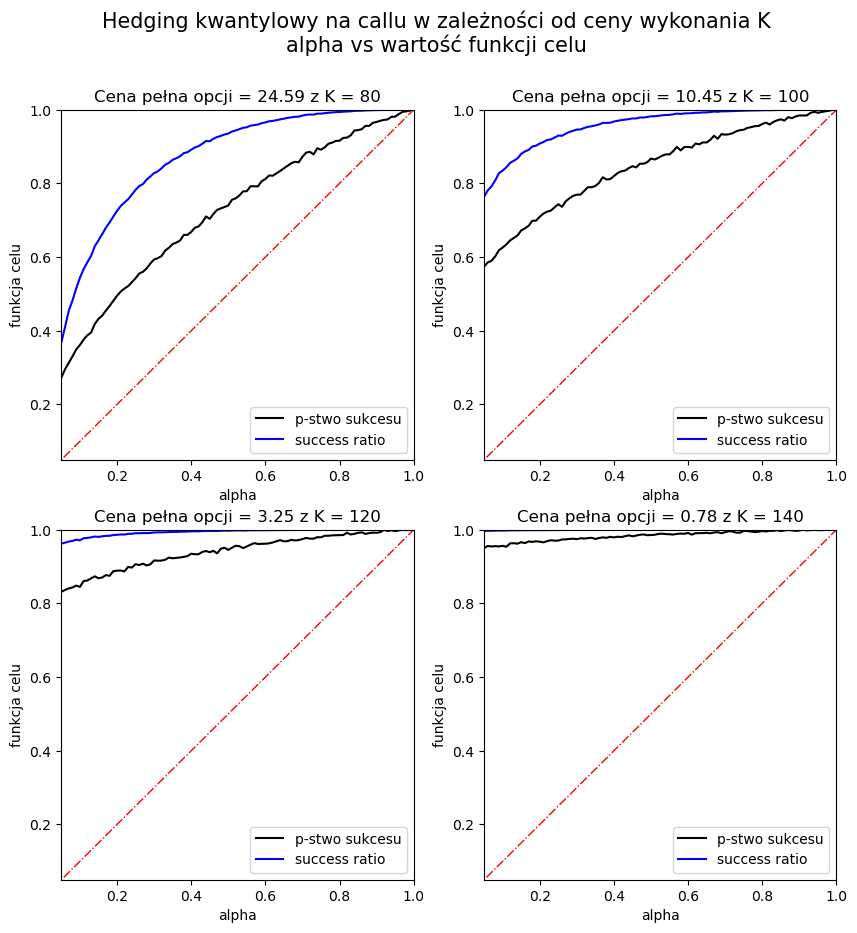

In [40]:
Ks = [80, 100, 120, 140]
fig, axs = plt.subplots(2, 2, figsize=(10,10))
for num, K in tqdm(enumerate(Ks)):
    vanilla_call = Vanilla(underlying, K, T, True)
    BS_price = vanilla_call.get_price(X0, 0)
    alphas = np.arange(5,101,1)/100
    probs = []
    ratios = []
    for a in alphas:
        _, objective_func, _ = payoff_from_v0(vanilla_call, a * BS_price, X0)
        probs.append(objective_func[0])
        ratios.append(objective_func[1])
    axs[num//2, num%2].plot(alphas, probs, color = 'black')
    axs[num//2, num%2].plot(alphas, ratios, color = 'blue')
    axs[num//2, num%2].legend(['p-stwo sukcesu', 'success ratio'])
    axs[num//2, num%2].plot([0,1],[0,1], color = 'red', lw = 1, linestyle='-.')
    axs[num//2, num%2].set_title(f'Cena pełna opcji = {BS_price:.2f} z K = {K}')
    axs[num//2, num%2].set_xlabel('alpha')
    axs[num//2, num%2].set_ylabel('funkcja celu')
    axs[num//2, num%2].set_xlim([0.05,1])
    axs[num//2, num%2].set_ylim([0.05,1])
plt.suptitle('Hedging kwantylowy na callu w zależności od ceny wykonania K\nalpha vs wartość funkcji celu', size = 15)

8it [00:02,  3.56it/s]


Text(0.5, 0.98, 'Kwantylowy hedging na putu używając połowy ceny w zależności od ceny wykonania K\nzmodyfikowany payoff')

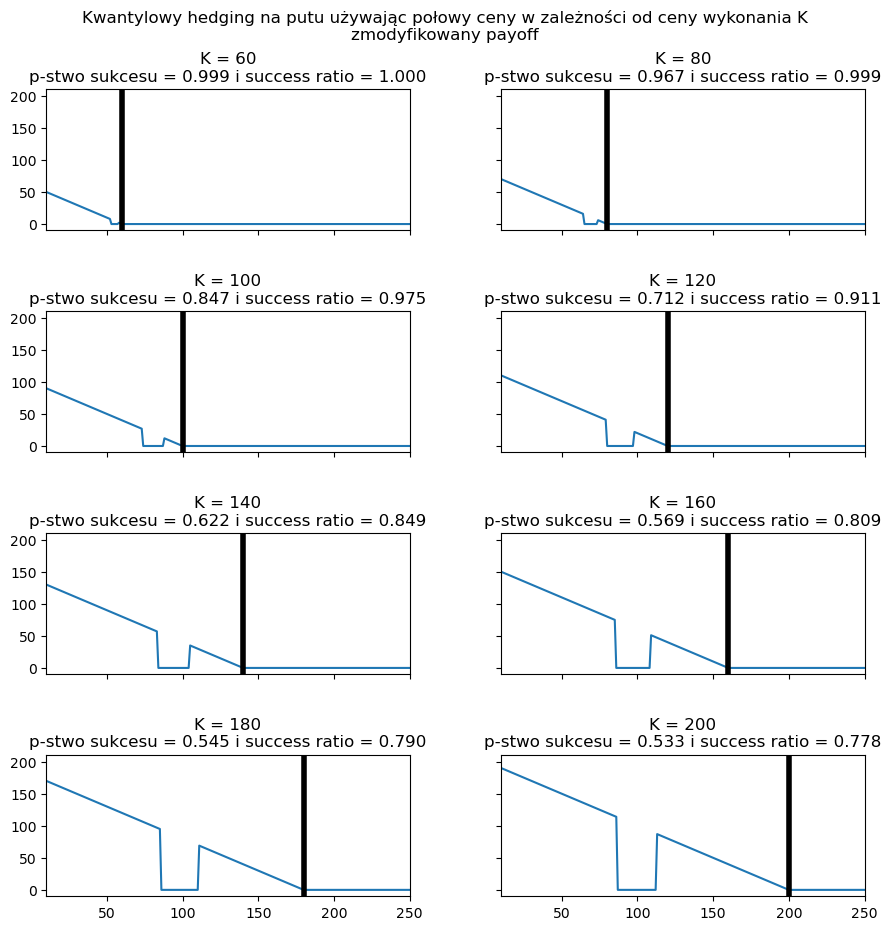

In [43]:
Ks = [60, 80, 100, 120, 140, 160, 180, 200]
X = pd.DataFrame(np.arange(0,300))
fig, axs = plt.subplots(4, 2, figsize=(10,10), sharex = True, sharey = True)
fig.tight_layout(pad=5.0)
for num, K in tqdm(enumerate(Ks)):
    vanilla_put = Vanilla(underlying, K, T, False)
    BS_price = vanilla_put.get_price(X0, 0)
    V0 = 0.5 * BS_price
    payoff_func, objective_func, _ = payoff_from_v0(vanilla_put, V0, X0)
    axs[num//2, num%2].plot(X, payoff_func(X))
    axs[num//2, num%2].set_title(f'K = {K}\np-stwo sukcesu = {objective_func[0]:.3f} i success ratio = {objective_func[1]:.3f}')
    axs[num//2, num%2].axvline(K, color = 'black', lw = 4)
    axs[num//2, num%2].set_xlim([10,250])
plt.subplots_adjust(top=0.9)
plt.suptitle('Kwantylowy hedging na putu używając połowy ceny w zależności od ceny wykonania K\nzmodyfikowany payoff', size = 12)

8it [00:01,  6.56it/s]


Text(0.5, 0.98, 'Kwantylowy hedging na putu(K = 120) w zależności od procenta użytej ceny\nzmodyfikowany payoff')

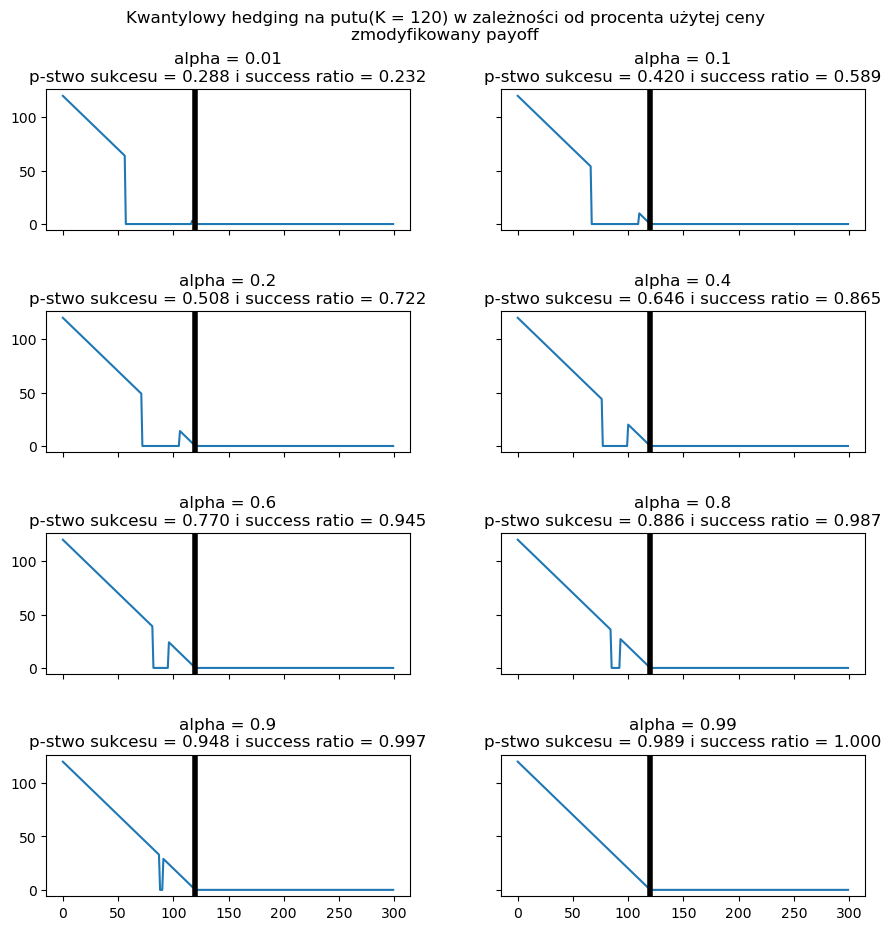

In [44]:
K = 120
alphas = [0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 0.9, 0.99]
X = pd.DataFrame(np.arange(0,300))
fig, axs = plt.subplots(4, 2, figsize=(10,10), sharex = True, sharey = True)
fig.tight_layout(pad=5.0)
vanilla_put = Vanilla(underlying, K, T, False)
BS_price = vanilla_put.get_price(X0, 0)
for num, alpha in tqdm(enumerate(alphas)):
    V0 = alpha * BS_price
    payoff_func, objective_func, c = payoff_from_v0(vanilla_put, V0, X0)
    axs[num//2, num%2].plot(X, payoff_func(X))
    axs[num//2, num%2].set_title(f'alpha = {alpha}\np-stwo sukcesu = {objective_func[0]:.3f} i success ratio = {objective_func[1]:.3f}')
    axs[num//2, num%2].axvline(K, color = 'black', lw = 4)
plt.subplots_adjust(top=0.9)
plt.suptitle(f'Kwantylowy hedging na putu(K = {K}) w zależności od procenta użytej ceny\nzmodyfikowany payoff', size = 12)

8it [00:02,  3.52it/s]


Text(0.5, 0.98, 'Kwantylowy hedging na putu(K = 120) używając połowy ceny w zależności od zmienności aktywa\nzmodyfikowany payoff')

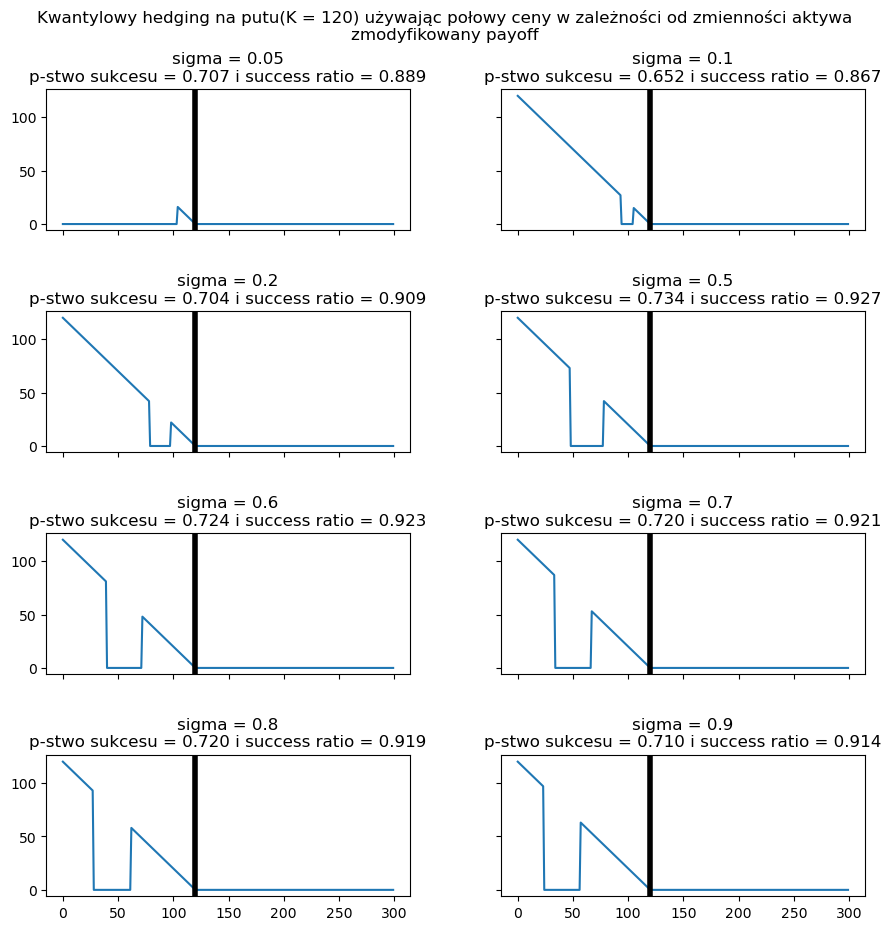

In [45]:
K = 120
sigmas = [0.05, 0.1, 0.2, 0.5, 0.6, 0.7, 0.8, 0.9]
X = pd.DataFrame(np.arange(0,300))
fig, axs = plt.subplots(4, 2, figsize=(10,10), sharex = True, sharey = True)
fig.tight_layout(pad=5.0)
for num, s in tqdm(enumerate(sigmas)):
    underlying = Underlying(mu, s, r, values_per_year)    
    vanilla_put = Vanilla(underlying, K, T, False)
    BS_price = vanilla_put.get_price(X0, 0)
    V0 = 0.5 * BS_price
    payoff_func, objective_func, _ = payoff_from_v0(vanilla_put, V0, X0)
    axs[num//2, num%2].plot(X, payoff_func(X))
    axs[num//2, num%2].set_title(f'sigma = {s}\np-stwo sukcesu = {objective_func[0]:.3f} i success ratio = {objective_func[1]:.3f}')
    axs[num//2, num%2].axvline(K, color = 'black', lw = 4)
plt.subplots_adjust(top=0.9)
plt.suptitle(f'Kwantylowy hedging na putu(K = {K}) używając połowy ceny w zależności od zmienności aktywa\nzmodyfikowany payoff', size = 12)

4it [00:56, 14.16s/it]


Text(0.5, 0.98, 'Hedging kwantylowy na putu w zależności od ceny wykonania K\nalpha vs wartość funkcji celu')

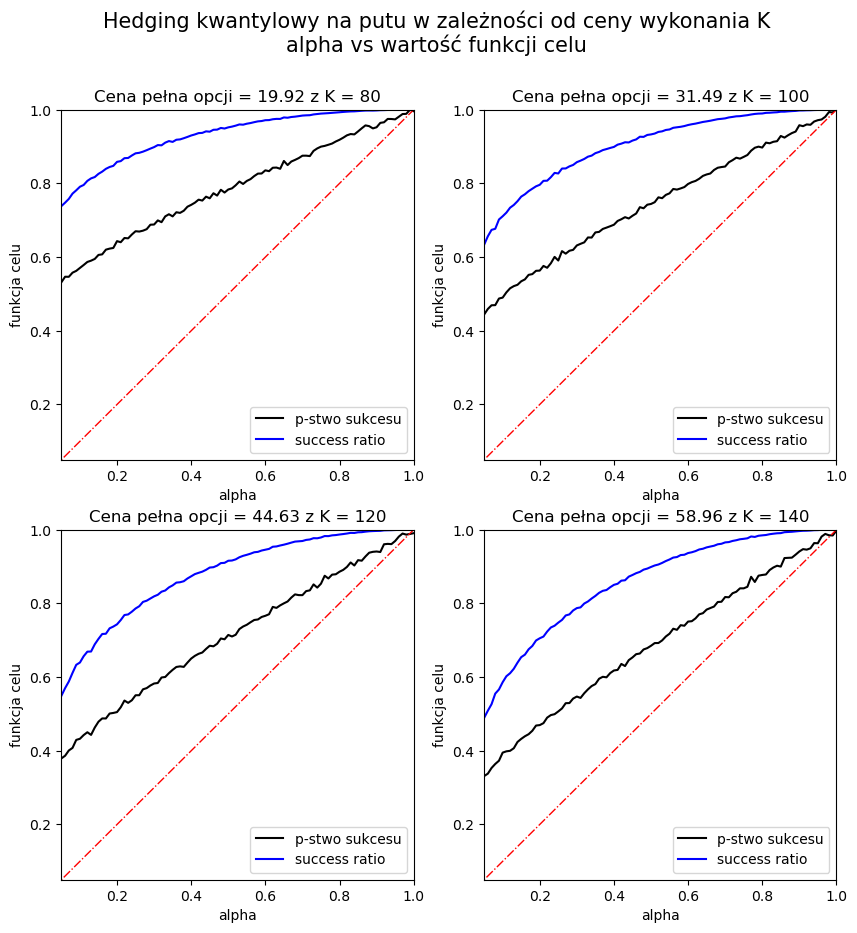

In [47]:
Ks = [80, 100, 120, 140]
fig, axs = plt.subplots(2, 2, figsize=(10,10))
for num, K in tqdm(enumerate(Ks)):
    vanilla_put = Vanilla(underlying, K, T, False)
    BS_price = vanilla_put.get_price(X0, 0)
    alphas = np.arange(5,101,1)/100
    probs = []
    ratios = []
    for a in alphas:
        _, objective_func, _ = payoff_from_v0(vanilla_put, a * BS_price, X0)
        probs.append(objective_func[0])
        ratios.append(objective_func[1])
    axs[num//2, num%2].plot(alphas, probs, color = 'black')
    axs[num//2, num%2].plot(alphas, ratios, color = 'blue')
    axs[num//2, num%2].legend(['p-stwo sukcesu', 'success ratio'])
    axs[num//2, num%2].plot([0,1],[0,1], color = 'red', lw = 1, linestyle='-.')
    axs[num//2, num%2].set_title(f'Cena pełna opcji = {BS_price:.2f} z K = {K}')
    axs[num//2, num%2].set_xlabel('alpha')
    axs[num//2, num%2].set_ylabel('funkcja celu')
    axs[num//2, num%2].set_xlim([0.05,1])
    axs[num//2, num%2].set_ylim([0.05,1])
plt.suptitle('Hedging kwantylowy na putu w zależności od ceny wykonania K\nalpha vs wartość funkcji celu', size = 15)

## Druga funkcja celu z niezerową miarą drugiego indykatora

Drugi indykator w drugiej funkcji celu:

$$D = \Big{\{} \frac{dP}{dQ} = \tilde{a} H \Big{\}}$$

$$\text{Cel: Stworzyć sytuację, w której } P(D) > 0$$

Inspiracja z dowodu:

$$D = \Big{\{} e^{\lambda W_{T} + \frac{1}{2} \lambda^{2}T} = \tilde{a} \cdot H \Big{\}},$$

**Procentowa Opcja Call:** <br>
Posiadacz opcji zyskuje możliwość zakupu w chwili $T$ aktywa po cenie $p \cdot S_{T}$, jeśli cena przekroczy próg $K$ $(\text{dla }p \in (0,1))$. <br>

**Payoff:** $H = \left( S_{T} - p \cdot S_{T} \right) \cdot \mathbb{1}_{\{ S_{T} > K \}} = \left( 1 - p \right) \cdot S_{T}  \cdot \mathbb{1}_{\{ S_{T} > K \}}$

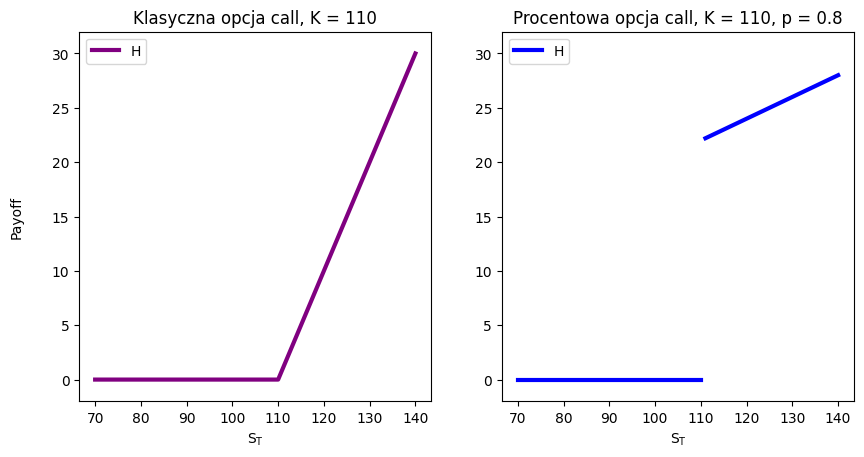

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(10)

ax1.set_xlabel('$\mathregular{S_T}$')
ax1.set_ylabel('Payoff', labelpad=20)
ax2.set_xlabel('$\mathregular{S_T}$')

# Payoff klasycznej funkcji call
ax1.plot(ST,np.array((X.iloc[:,-1] - K) * (X.iloc[:,-1] > K)), color = 'purple', linewidth = 3, label='H')
ax1.set_ylim(top=max(max((X.iloc[:,-1] - K) * (X.iloc[:,-1] > K)),max(measure_payoff(X.iloc[ST>K,:],p,K)))+2)
ax1.set_ylim(bottom = -2)
ax1.set_title('Klasyczna opcja call, K = ' + str(K))
ax1.legend(loc="upper left")
ax1.set_xticks(np.arange(70,141,10))

# Payoff procentowej opcji call
ax2.plot(ST[ST<=K],np.array(measure_payoff(X.iloc[ST<=K,:],p,K)), color = 'blue', linewidth = 3, label='H')
ax2.plot(ST[ST>K],np.array(measure_payoff(X.iloc[ST>K,:],p,K)), color = 'blue', linewidth = 3)
ax2.set_ylim(top=max(max((X.iloc[:,-1] - K) * (X.iloc[:,-1] > K)),max(measure_payoff(X.iloc[ST>K,:],p,K)))+2)
ax2.set_ylim(bottom = -2)
ax2.set_title('Procentowa opcja call, K = ' + str(K) + ', p = ' +  str(p))
ax2.legend(loc="upper left")
ax2.set_xticks(np.arange(70,141,10))
plt.show()

Podstawienie nowego payoffu:

$$D = \Big{\{} e^{\lambda W_{T} + \frac{1}{2} \lambda^{2}T} = \tilde{a} \cdot \left( 1 - p \right) \cdot S_{T} \cdot \mathbb{1}_{\{ S_{T} > K \}}  \Big{\}}$$

oraz rozpisanie $S_{T}$:

$$D = \Big{\{} e^{\lambda W_{T} + \frac{1}{2} \lambda^{2}T} = \tilde{a} \cdot \left( 1 - p \right) \cdot e^{\left(\mu - \frac{\sigma^{2}}{2}\right)T + \sigma W_{T}} \cdot \mathbb{1}_{\{ S_{T} > K \}}  \Big{\}}.$$

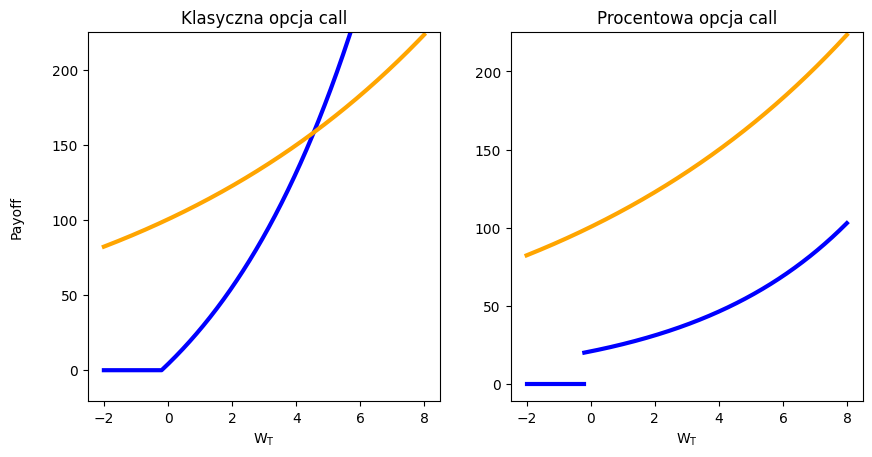

In [35]:
################
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(10)

ax1.set_xlabel('$\mathregular{W_T}$')
ax1.set_ylabel('Payoff', labelpad=20)
ax2.set_xlabel('$\mathregular{W_T}$')
#ax2.set_ylabel('Payoff', labelpad=20)

# Payoff klasycznej funkcji call
ax1.plot(WT,np.array((X.iloc[:,-1] - K) * (X.iloc[:,-1] > K)), color = 'blue', linewidth = 3)
ax1.plot(WT, X0*dP_dQ, color = 'orange', linewidth = 3)
ax1.set_ylim(top=max(X0*dP_dQ)+2)
ax1.set_title('Klasyczna opcja call')

# Payoff procentowej opcji call
ax2.plot(WT[ST<=K],np.array(measure_payoff(X.iloc[ST<=K,:],p,K)), color = 'blue', linewidth = 3)
ax2.plot(WT[ST>K],np.array(measure_payoff(X.iloc[ST>K,:],p,K)), color = 'blue', linewidth = 3)
ax2.plot(WT, X0*dP_dQ, color = 'orange', linewidth = 3)
ax2.set_title('Procentowa opcja call')
ax2.set_ylim(top=max(X0*dP_dQ)+2)
plt.show()

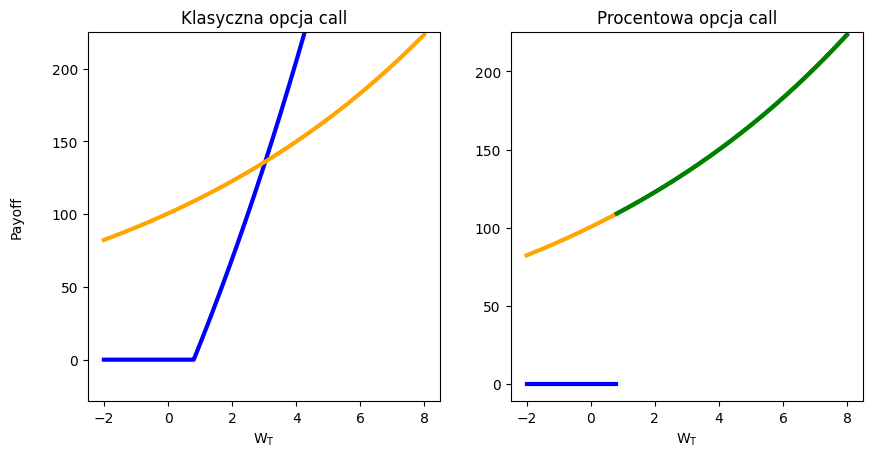

In [14]:
#Przeskalowane przez a_wave
a_wave = np.exp((sigma**2-mu)*T)/(1-p)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(10)

ax1.set_xlabel('$\mathregular{W_T}$')
ax1.set_ylabel('Payoff', labelpad=20)
ax2.set_xlabel('$\mathregular{W_T}$')
#ax2.set_ylabel('Payoff', labelpad=20)

# Payoff klasycznej funkcji call
ax1.plot(WT,a_wave*np.array((X.iloc[:,-1] - K) * (X.iloc[:,-1] > K)), color = 'blue', linewidth = 3)
ax1.plot(WT, X0*dP_dQ, color = 'orange', linewidth = 3)
ax1.set_ylim(top=max(X0*dP_dQ)+2)
ax1.set_title('Klasyczna opcja call')
ax1.plot()

# Payoff procentowej opcji call
ax2.plot(WT[ST<=K],np.array(a_wave*measure_payoff(X.iloc[ST<=K,:],p,K)), color = 'blue', linewidth = 3)
ax2.plot(WT[ST>K],np.array(a_wave*measure_payoff(X.iloc[ST>K,:],p,K)), color = 'green', linewidth = 3)
ax2.plot(WT[ST<=K], X0*dP_dQ[ST<=K], color = 'orange', linewidth = 3)
ax2.plot(WT[ST>K], X0*dP_dQ[ST>K], color = 'green', linewidth = 3)
ax2.set_title('Procentowa opcja call')
ax2.set_ylim(top=max(X0*dP_dQ)+2)
plt.show()

Kluczowy warunek:

$$\lambda = \sigma,$$

co po rozpisaniu $\lambda = \frac{\mu-r}{\sigma}$ daje

$$\mu - r = \sigma^{2}$$

Skracamy
$$D = \Big{\{} e^{\left(\sigma^{2} - \mu \right)T} = \tilde{a} \cdot \left( 1 - p \right) \cdot \mathbb{1}_{\{ S_{T} > K \}}  \Big{\}}$$

Potrzebujemy policzyć $\tilde{a}$:

$$\tilde{a} = inf \Big{\{} a: Q^{*} \left( \frac{dP}{dQ} > a \cdot H \right) \leq \alpha \Big{\}},$$

po podstawieniu $\frac{dP}{dQ}$, $H$ i przekształceniach:

$$\tilde{a} = inf \Big{\{} a: Q^{*} \left( \frac{e^{\left(\sigma^{2} - \mu \right)T}}{a \cdot \left( 1 - p \right)} > \mathbb{1}_{\{ S_{T} > K \}} \right) \leq \alpha \Big{\}}.$$

Wprowadźmy oznaczenie

$$l(a) := \frac{e^{\left(\sigma^{2} - \mu \right)T}}{a \cdot \left( 1 - p \right)} \quad \Rightarrow \quad inf \Big{\{} a: Q^{*} \left( l(a) > \mathbb{1}_{\{ S_{T} > K \}} \right) \leq \alpha \Big{\}}$$

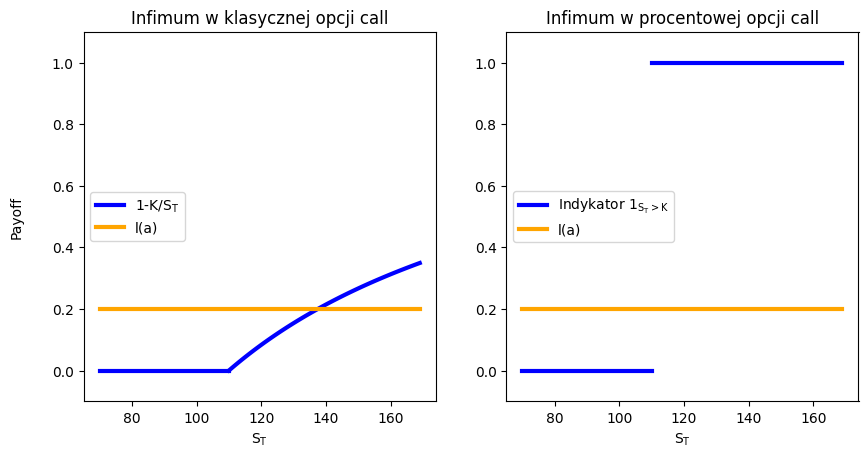

In [15]:
ST = np.arange(70,170,1)
K = 110

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(10)

ax1.set_xlabel('$\mathregular{S_T}$')
ax1.set_ylabel('Payoff', labelpad=20)
ax2.set_xlabel('$\mathregular{S_T}$')
#ax2.set_ylabel('Payoff', labelpad=20)

# Infimum w klasycznej opcji call
ax1.plot(ST[ST<=K],np.zeros(len(ST[ST<=K])), color = 'blue', linewidth = 3, label = '1-K/$\mathregular{S_T}$')
ax1.plot(ST[ST>=K],1-K/ST[ST>=K], color = 'blue', linewidth = 3)
ax1.plot(ST,0.2*np.ones(len(ST)), color = 'orange', linewidth = 3, label='l(a)')
ax1.set_title('Infimum w klasycznej opcji call')
ax1.set_xlabel('$\mathregular{S_T}$')
ax1.set_ylim([-0.1,1.1])
ax1.legend(loc="center left")

# Infimum w klasycznej opcji call
ax2.plot(ST[ST<=K],np.zeros(len(ST[ST<=K])), color = 'blue', linewidth = 3, label='Indykator $\mathregular{1_{S_T > K}}$' )
ax2.plot(ST[ST>=K],np.ones(len(ST[ST>=K])), color = 'blue', linewidth = 3)
ax2.plot(ST,0.2*np.ones(len(ST)), color = 'orange', linewidth = 3, label='l(a)')
ax2.set_title('Infimum w procentowej opcji call')
ax2.set_xlabel('$\mathregular{S_T}$')
ax2.set_ylim([-0.1,1.1])
ax2.legend(loc="center left")
plt.show()

Zachodzi: 
$$Q^{*} \left(S_{T} > K \right) = 0$$

Dowód:
$$Q^{*} \left(S_{T} \leq K \right) = \mathbb{E}_{Q^{*}} \left[ \mathbb{1}_{\{ S_{T} \leq K \}} \right] = \mathbb{E}_{Q} \left[ \frac{dQ^{*}}{dQ} \mathbb{1}_{\{ S_{T} \leq K \}} \right] = $$ $$ \mathbb{E}_{Q} \left[ \frac{H}{H_{0}} \mathbb{1}_{\{ S_{T} \leq K \}} \right] = \mathbb{E}_{Q} \left[ \frac{\left( 1 - p \right) \cdot S_{T}  \cdot \mathbb{1}_{\{ S_{T} > K \}}}{H_{0}} \mathbb{1}_{\{ S_{T} \leq K \}} \right] = 0.$$

Redukuje to nam sytuację do dwóch przypadków

1. Jeśli $l(a) < 1$ to $Q^{*} \left( l(a) > \mathbb{1}_{\{ S_{T} > K \}} \right) = 0$ 

2. Jeśli $l(a) \geq 1$ to $Q^{*} \left( l(a) > \mathbb{1}_{\{ S_{T} > K \}} \right) = 1$

$l(a)$ jest malejące, więc infimum jest osiagane dla $l(a) = 1$.

# Wyniki drugiej funkcji celu na Procentowej Opcji Call

Optymalizacja drugiej funkcji celu: $\tilde{\phi} \cdot H$ dla

$$\tilde{\phi} = \mathbb{1}_{\{ \frac{dP}{dQ} \leq \tilde{a}H \}} + \gamma \cdot \mathbb{1}_{\{ \frac{dP}{dQ} = \tilde{a}H \}},$$

gdzie
$$\gamma = \frac{\alpha - Q^{*}\left( \frac{dP}{dQ} \leq \tilde{a}H \right)}{Q^{*}\left( \frac{dP}{dQ} = \tilde{a}H \right)} \quad \Rightarrow \quad \gamma = \frac{\alpha - 0}{1} = \alpha$$


$$\tilde{\phi} = \alpha \cdot \mathbb{1}_{\{ \frac{dP}{dQ} = \tilde{a}H \}} = \frac{V_{0}}{H_{0}} \cdot \mathbb{1}_{\{ \frac{dP}{dQ} = \tilde{a}H \}}$$

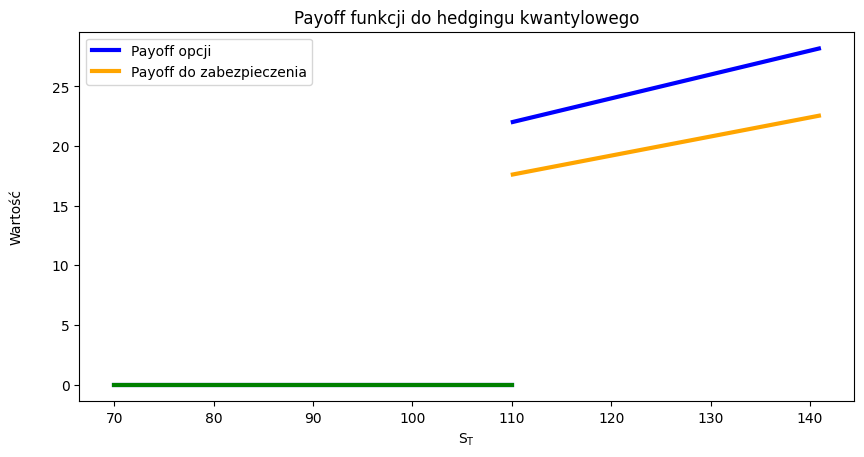

In [16]:
ST = np.arange(70,141,0.1)
X = np.zeros(shape=(len(ST),2))
X[:,0], X[:,1] = X0, ST
X = pd.DataFrame(X)

fig = plt.figure()
fig.set_figwidth(10)
plt.plot(ST[ST<=K],np.array(measure_payoff(X.iloc[ST<=K,:],p,K)), color = 'blue', linewidth = 3, label='Payoff opcji')
plt.plot(ST[ST>K],np.array(measure_payoff(X.iloc[ST>K,:],p,K)), color = 'blue', linewidth = 3)
plt.plot(ST[ST<=K],np.array(measure_payoff(X.iloc[ST<=K,:],p,K)), color = 'green', linewidth = 3)
plt.plot(ST[ST>K],0.8*np.array(measure_payoff(X.iloc[ST>K,:],p,K)), color = 'orange', linewidth = 3, label='Payoff do zabezpieczenia')
plt.xlabel('$\mathregular{S_T}$')
plt.ylabel('Wartość', labelpad=20)
plt.title('Payoff funkcji do hedgingu kwantylowego')
plt.legend(loc="upper left")
plt.show()

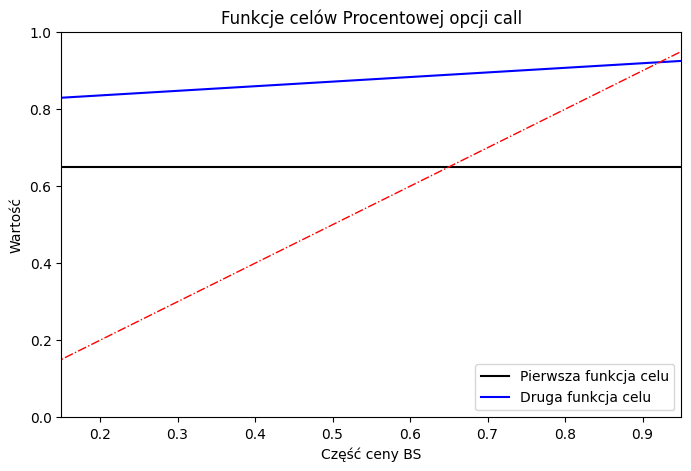

In [36]:
fig = plt.figure()
fig.set_figwidth(8,5)
fig.set_figheight(5)
plt.plot(alphas, Collection_Funkcja_Uno_Mean, color = 'black')
plt.plot(alphas, Collection_Funkcja_Dos_Mean, color = 'blue')
plt.legend(['Pierwsza funkcja celu', 'Druga funkcja celu'], loc = 'lower right')
plt.plot([0,1],[0,1], color = 'red', lw = 1, linestyle='-.')
plt.title('Funkcje celów Procentowej opcji call')
plt.xlabel('Część ceny BS')
plt.ylabel('Wartość')
plt.xlim([min(alphas),max(alphas)])
plt.ylim([0,1])
plt.show()

In [3]:
mu_nt = 0.06
mu_t = 0.06
sigma_nt =  0.3
sigma_t =  0.3
r = 0.05
X0_nt = 100
X0_t = 100
T = 1
K = 100
repeat = 10000
values_per_year = 250

In [5]:
def dP_dQ(mu, sigma, T, r, W_T): 
    return np.exp(W_T * (mu-r) / sigma + 0.5 * T * ((mu - r) / sigma) ** 2)
def integrand(y, S0, mu, sigma, rho, W_T_tilde, K, T, type = "call"):
    if type == "call":
        return 1 / np.sqrt(np.pi * 2 * T) / (S0 * np.exp(mu * T + sigma * W_T_tilde * rho + np.sqrt(1 - rho ** 2) * sigma * y - 0.5 * sigma ** 2 * T) - K) * np.exp(y ** 2 / (-2 * T) )
    elif type == "put":
        return 1 / np.sqrt(np.pi * 2 * T) / (K - S0 * np.exp(mu * T + sigma * W_T_tilde * rho + np.sqrt(1 - rho ** 2) * sigma * y - 0.5 * sigma ** 2 * T)) * np.exp(y ** 2 / (-2 * T) )
    else:
        raise Exception("Wrong type")
def G_func(x, mu, sigma, mu_tilde, sigma_tilde, r, T, K, S0, W_T_tilde, rho, type = "call", target_function = 1, derivative = False, arg_inf = 100):
    if x <= 0:
        raise Exception("x should be greater than 0")
    if type == "put" and x >= K:
        raise Exception("x should be  smaller than K")
    if derivative == False:
        if target_function == 1:
            if type == "call":
                return dP_dQ(mu_tilde, sigma_tilde, T, r, W_T_tilde) * norm.cdf((np.log((K+x)/S0) - mu * T + 0.5 * sigma ** 2 * T - sigma * rho * W_T_tilde)/ (sigma * np.sqrt(T * (1 - rho ** 2))))
            elif type == "put":
                return dP_dQ(mu_tilde, sigma_tilde, T, r, W_T_tilde) * (1 -norm.cdf((np.log((K-x)/S0) - mu * T + 0.5 * sigma ** 2 * T - sigma * rho * W_T_tilde)/ (sigma * np.sqrt(T * (1 - rho ** 2)))))
        elif target_function == 2:
            arg_inf = np.sqrt(arg_inf * T)
            if type == "call":
                g1 = G_func(x, mu, sigma, mu_tilde, sigma_tilde, r, T, K, S0, W_T_tilde, rho, type = "call", target_function = 1, derivative = False)
                a = (np.log((K + x)/ S0) - mu * T + sigma ** 2 * T * 0.5 - rho * sigma * W_T_tilde) / (sigma * np.sqrt(1 -rho ** 2))
                a_bis = max(a, -arg_inf)
                g2 = x * integrate.quad(integrand, a_bis, arg_inf, args = (S0, mu, sigma, rho, W_T_tilde, K, T, "call"))[0]
                return g1 + g2 * dP_dQ(mu_tilde, sigma_tilde, T, r, W_T_tilde)
            elif type == "put":
                arg_inf = -np.sqrt(arg_inf * T)
                g1 = G_func(x, mu, sigma, mu_tilde, sigma_tilde, r, T, K, S0, W_T_tilde, rho, type = "put", target_function = 1, derivative = False)
                b = (np.log((K - x) / S0) - mu * T + sigma ** 2 * T * 0.5 - rho * sigma * W_T_tilde) / (sigma * np.sqrt(1 - rho ** 2))
                b_bis = min(b, -arg_inf)
                g2 = x * integrate.quad(integrand, arg_inf, b_bis, args = (S0, mu, sigma, rho, W_T_tilde, K, T, "put"))[0]
                return g1 + g2 * dP_dQ(mu_tilde, sigma_tilde, T, r, W_T_tilde)
    elif derivative == True:
        if target_function == 1:
            if type == "call":
                return np.exp(-(np.log((K+x)/S0) - mu * T + 0.5 * sigma ** 2 * T - sigma * rho * W_T_tilde) ** 2 / (2 * sigma ** 2 * T * (1 - rho ** 2)))/((K + x) * sigma * np.sqrt(T * (1 - rho ** 2 ) * 2 * np.pi)) * dP_dQ(mu_tilde, sigma_tilde, T, r, W_T_tilde)
            elif type == "put":
                return np.exp(-(np.log((K-x)/S0) - mu * T + 0.5 * sigma ** 2 * T - sigma * rho * W_T_tilde) ** 2 / (2 * sigma ** 2 * T * (1 - rho ** 2)))/((K- x) * sigma * np.sqrt(T * (1 - rho ** 2 ) * 2 * np.pi)) * dP_dQ(mu_tilde, sigma_tilde, T, r, W_T_tilde)
        elif target_function == 2:
            arg_inf = np.sqrt(arg_inf * T)
            if type == "call":
                arg_inf = np.sqrt(arg_inf * T)
                a = (np.log((K + x)/ S0) - mu * T + sigma ** 2 * T * 0.5 - rho * sigma * W_T_tilde) / (sigma * np.sqrt(1 -rho ** 2))
                a_bis = max(a, -arg_inf)
                g2 = integrate.quad(integrand, a_bis, arg_inf, args = (S0, mu, sigma, rho, W_T_tilde, K, T, "call"))[0]
                return g2 * dP_dQ(mu_tilde, sigma_tilde, T, r, W_T_tilde)
            elif type == "put":
                arg_inf = -np.sqrt(arg_inf * T)
                b = (np.log((K - x) / S0)  - mu * T + sigma ** 2 * T * 0.5 - rho * sigma * W_T_tilde) / (sigma * np.sqrt(1 - rho ** 2))
                b_bis = min(b, -arg_inf)
                g2 = integrate.quad(integrand, arg_inf, b_bis, args = (S0, mu, sigma, rho, W_T_tilde, K, T,"put"))[0]
                return g2 * dP_dQ(mu_tilde, sigma_tilde, T, r, W_T_tilde)
    else:
        raise Exception("Wrong arguments")
def get_coefficients(m, mu, sigma, mu_tilde, sigma_tilde, r, T, K, S0, W_T_tilde, rho):
    m_tilde = m / dP_dQ(mu_tilde, sigma_tilde, T, r, W_T_tilde)
    a = 1
    b = 2 * sigma ** 2 * T * (1 - rho ** 2 ) - 2 * np.log(S0) - 2 * mu * T + sigma ** 2 * T - 2 * rho * sigma * W_T_tilde
    c = np.log(m_tilde * sigma * np.sqrt(2 * np.pi * T * (1 - rho ** 2))) * (2 * sigma ** 2 * T * (1 - rho ** 2 )) + (-np.log(S0) - mu * T + sigma ** 2 * T * 0.5 - rho * sigma * W_T_tilde) ** 2 
    return a, b, c

def get_delta(a, b, c):
    return b ** 2 - 4 * a * c

def wrapping_function(x, mu, sigma, mu_tilde, sigma_tilde, r, T, K, S0, W_T_tilde, rho, type, arg_inf, m):
    return G_func(x, mu, sigma, mu_tilde, sigma_tilde, r, T, K, S0, W_T_tilde, rho, type, 2, True, arg_inf) - m

def find_x(m, W_T_tilde, mu, sigma, mu_tilde, sigma_tilde, r, T, K, S0,  rho, type = 'call', target_function = 1,  left_bound = 0.01,eps = 0.1 ** 10, right_bound = 100, arg_inf = 120):
    if target_function == 1:
        coef = get_coefficients(m, mu, sigma, mu_tilde, sigma_tilde, r, T, K, S0, W_T_tilde, rho)
        delta = get_delta(*coef)
        if delta < 0:
            return 0
        elif delta == 0:
            if type == 'call':
                x = (np.exp( -1 * coef[1] / (2 * coef[0])) - K)
            elif type == 'put':
                x = -(np.exp( -1 * coef[1] / (2 * coef[0])) - K)
            else:
                raise Exception("Wrong type")
        else:
            if type == 'call':
                x = np.exp(( -1 * coef[1] + np.sqrt(delta)) / (2 * coef[0] )) - K
            elif type == 'put':
                x = -np.exp(( -1 * coef[1] - np.sqrt(delta)) / (2 * coef[0] )) + K
            else:
                raise Exception("Wrong type")
        if x < 0:
            return 0
        b = G_func(x, mu, sigma, mu_tilde, sigma_tilde, r, T, K, S0, W_T_tilde, rho, type) - m * x
        if G_func(left_bound, mu, sigma, mu_tilde, sigma_tilde, r, T, K, S0, W_T_tilde, rho, type) -m * left_bound - b > 0:
            return 0
        return x
    elif target_function == 2:
        x0 = G_func(left_bound, mu, sigma, mu_tilde, sigma_tilde, r, T, K, S0, W_T_tilde, rho, type, target_function = 2, derivative = True)
        if m > x0:
            return 0
        if type == "call":
            while True:
                if(G_func(right_bound, mu, sigma, mu_tilde, sigma_tilde, r, T, K, S0, W_T_tilde, rho, type, target_function, derivative = True) < m):
                    break
                else:
                    right_bound = 2 * right_bound
                if(right_bound > 10 ** 6):
                    raise Exception("m too small")  
        elif type == "put":
            right_bound = K - 0.001
        return (root_scalar(wrapping_function, args = (mu, sigma, mu_tilde, sigma_tilde, r, T, K, S0, W_T_tilde, rho, type, arg_inf, m), bracket= (left_bound, right_bound), method = "bisect", rtol= eps).root)

def plot_line_G(x, m, mu, sigma, mu_tilde, sigma_tilde, r, T, K, S0, W_T_tilde, rho, type = 'call', grid_step = 0.1, x_range = 50, target_function = 1, kind_of_plot = 'diff'):
    if type == 'put' and  x_range > K:
        x_range = K
    x_grid = np.arange(grid_step, x_range, grid_step)
    df = pd.DataFrame({ "x" : x_grid, "G(x)" : None, "Line" : None, "Diff" : None})
    if target_function == 1:
        string = "G(x)"
    else:
        string = "G2(x)"
        
    for i in range(len(x_grid)):
        if type == 'call':
            b = G_func(x, mu, sigma, mu_tilde, sigma_tilde, r, T, K, S0, W_T_tilde, rho, type, target_function) - m * x
            df.at[i, string] = G_func(df.at[i, 'x'], mu, sigma, mu_tilde, sigma_tilde, r, T, K, S0, W_T_tilde, rho, type, target_function)
            df.at[i, "Line"] = m * df.at[i, 'x'] + b
            df.at[i, "Diff"] = df.at[i, "Line"] - df.at[i, string] 
        else:
            b = G_func(x, mu, sigma, mu_tilde, sigma_tilde, r, T, K, S0, W_T_tilde, rho, type, target_function) - m * x
            df.at[i, string] = G_func(df.at[i, 'x'], mu, sigma, mu_tilde, sigma_tilde, r, T, K, S0, W_T_tilde, rho, type, target_function)
            df.at[i, "Line"] = m * df.at[i, 'x'] + b
            df.at[i, "Diff"] = df.at[i, "Line"] - df.at[i, string]
    return df
    #df.plot(x = 'x', y = [1,2])
    if kind_of_plot == 'diff':
        df.plot(x = 'x', y = [3], title = f"Target function = {target_function}, W_tilde = {W_T_tilde}, type = {type}")
    else:
        df.plot(x = 'x', y = [string,"Line"], title = f"Target function = {target_function}, W_tilde = {W_T_tilde}, type = {type}")
    return 0
    
       


In [25]:
x_range = 200
delta = 0.1
W_T_tilde = 3
rho = 0.7
x_call = np.arange(delta, x_range + delta, delta)
df_call = pd.DataFrame({ "x" : x_call, "G(x)" : None, "G2(x)" : None, "G2'(x)" : None})
m = 0.005
for i in range(len(x_call)):
    df_call.at[i, "G(x)"] = G_func(df_call.at[i, 'x'], mu_nt, sigma_nt, mu_t, sigma_t, r, T, K, X0_nt, W_T_tilde, rho, type = "call", target_function = 1, derivative = False)
    df_call.at[i, "G2(x)"] = G_func(df_call.at[i, 'x'], mu_nt, sigma_nt, mu_t, sigma_t, r, T, K, X0_nt, W_T_tilde, rho, type = "call", target_function = 2, derivative = False)
    df_call.at[i, "G'(x)"] = G_func(df_call.at[i, 'x'], mu_nt, sigma_nt, mu_t, sigma_t, r, T, K, X0_nt, W_T_tilde, rho, type = "call", target_function = 1, derivative = True)
    df_call.at[i, "G2'(x)"] = G_func(df_call.at[i, 'x'], mu_nt, sigma_nt, mu_t, sigma_t, r, T, K, X0_nt, W_T_tilde, rho, type = "call", target_function = 2, derivative = True)

# Aktywo Niehadlowalne

### Pierwsza funkcja celu


$F_Q(x) = \frac{\partial P}{\partial Q}\mathbb{P} \left( H \leq V_T \right | \widetilde{W_T})$




##### Opcja Call
$F_Q(x) = \frac{\partial P}{\partial Q} \Phi \left[ \frac{\log{(K+x)} - \log{S_0}- \mu T + \frac{\sigma^2 T}{2} - \rho \sigma \widetilde{W_T}}{\sigma \sqrt{T(1-\rho^2)}}\right] $

##### Opcja Put
$F_Q(x) = \frac{\partial P}{\partial Q} \left ( 1- \Phi \left[ \frac{\log{(K-x)} - \log{S_0}- \mu T + \frac{\sigma^2 T}{2} - \rho \sigma \widetilde{W_T}}{\sigma \sqrt{T(1-\rho^2)}}\right] \right)$

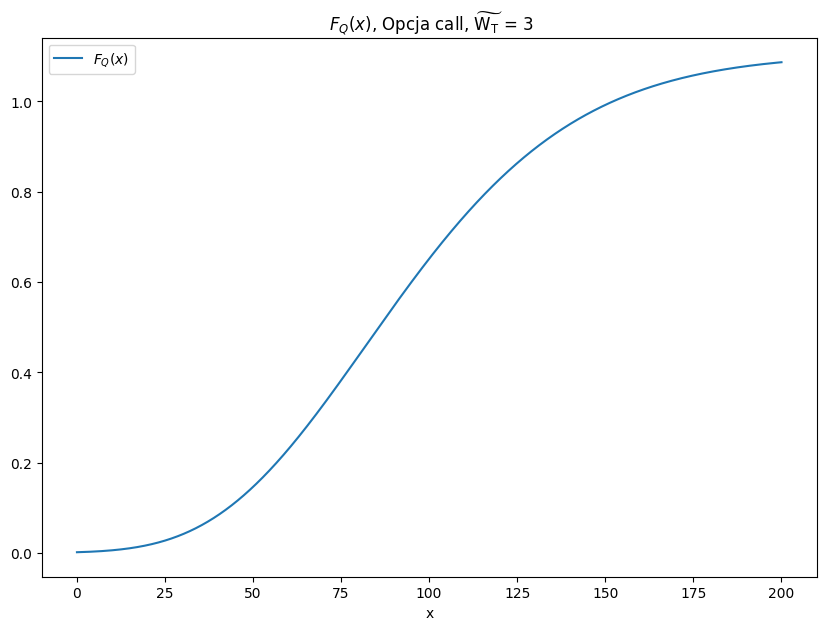

In [26]:
fig, ax = plt.subplots(1,1, figsize = (10, 7))
ax.plot(df_call['x'],df_call['G(x)'], label = "$F_Q(x)$")
ax.set_title(" $F_Q(x)$, Opcja call, $\widetilde{\mathregular{W_T}}$ = 3")
ax.set_xlabel('x')
ax.legend(loc='upper left')
plt.show()

#### Pochodne

##### Opcja Call
$F^{'}_Q(x) = \frac{\partial P}{\partial Q} \frac{1}{\sqrt{2\pi}} \exp{\left( - \frac{ \left[\log{(K+x)} - \log{S_0}- \mu T + \frac{\sigma^2 T}{2} - \rho \sigma \widetilde{W_T}\right]^2} {2 \sigma^2 T(1-\rho^2)} \right)} \frac{1}{\left(K+x\right) \left( \sigma \sqrt{T(1-\rho^2)}\right)} $

##### Opcja Put
$F^{'}_Q(x) = \frac{\partial P}{\partial Q} \frac{1}{\sqrt{2\pi}} \exp{\left( - \frac{ \left[\log{(K-x)} - \log{S_0}- \mu T + \frac{\sigma^2 T}{2} - \rho \sigma \widetilde{W_T}\right]^2} {2 \sigma^2 T(1-\rho^2)} \right)} \frac{1}{\left(K-x\right) \left( \sigma \sqrt{T(1-\rho^2)}\right)} $

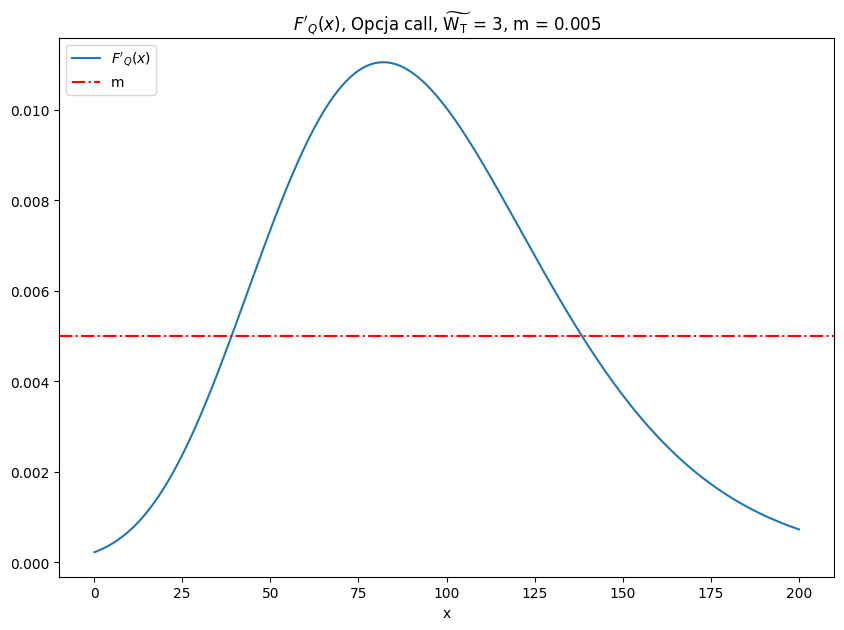

In [27]:
fig, ax = plt.subplots(1,1, figsize = (10, 7))

ax.plot(df_call["x"],df_call["G'(x)"], label = "$F'_Q(x)$")
ax.set_title("$F'_Q(x)$, Opcja call, $\widetilde{\mathregular{W_T}}$ = 3, m = 0.005")
ax.set_xlabel('x')
plt.axhline(y = 0.005, color = 'r', linestyle = 'dashdot', label = "m")
ax.legend(loc='upper left')
plt.show()

##### Jak znaleźć x, takie że $F^{'}_Q(x) = m$
$ \frac{\partial P}{\partial Q} \frac{1}{\sqrt{2\pi}} \exp{\left( - \frac{ \left[\log{(K+x)} - \log{S_0}- \mu T + \frac{\sigma^2 T}{2} - \rho \sigma \widetilde{W_T}\right]^2} {2 \sigma^2 T(1-\rho^2)} \right)} \frac{1}{\left(K+x\right) \left( \sigma \sqrt{T(1-\rho^2)}\right)} = m $

$ \exp{\left( - \frac{ \left[\log{(K+x)} - \log{S_0}- \mu T + \frac{\sigma^2 T}{2} - \rho \sigma \widetilde{W_T}\right]^2} {2 \sigma^2 T(1-\rho^2)} \right)} \frac{1}{\left(K+x\right)} = m \cdot \text{const}$

$   \frac{ \left[\log{(K+x)} - \log(S_0)- \mu T + \frac{\sigma^2 T}{2} - \rho \sigma \widetilde{W_T}\right]^2} {2 \sigma^2 T(1-\rho^2)} + \log(K+x)  = -\log \left( m \cdot \text{const} \right)$


In [28]:
x = find_x(m, W_T_tilde, mu_nt, sigma_nt, mu_t, sigma_t, r, T, K, X0_nt,  rho, type = 'call', target_function = 1,  left_bound = 0.01,eps = 0.1 ** 10, right_bound = 100, arg_inf = 120)
df = plot_line_G(x, m, mu_nt, sigma_nt, mu_t, sigma_t, r, T, K, X0_nt, W_T_tilde, rho, type = 'call', x_range = 200)

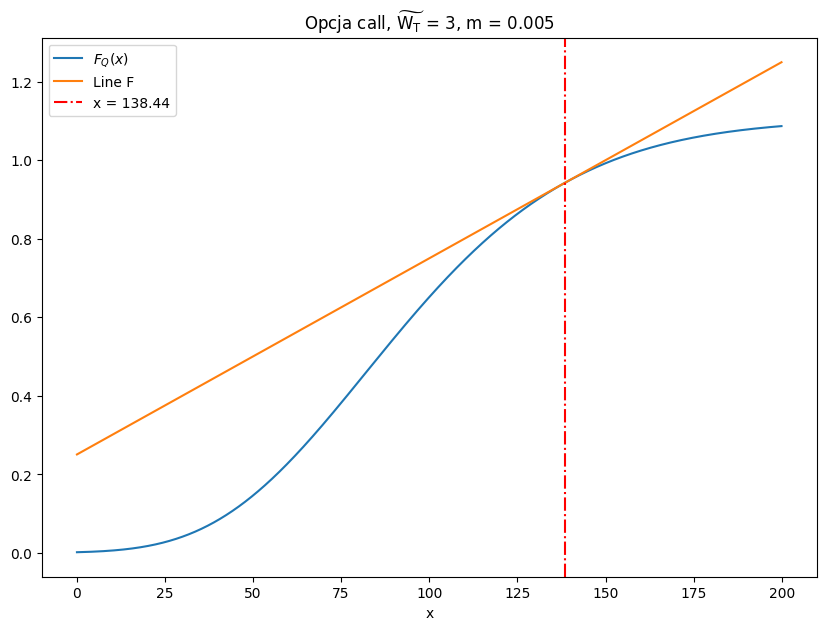

In [29]:
fig, ax = plt.subplots(1,1, figsize = (10, 7))

ax.plot(df["x"],df["G(x)"], label = "$F_Q(x)$")
ax.plot(df["x"],df["Line"], label = "Line F")

ax.set_title("Opcja call, $\widetilde{\mathregular{W_T}}$ = 3, m = 0.005")
ax.set_xlabel('x')
plt.axvline(x = x, color = 'r', linestyle = 'dashdot', label = "x = 138.44")
ax.legend(loc='upper left')
plt.show()

## Wyniki symulacji

100%|██████████████████████████████████████| 1999/1999 [00:10<00:00, 192.37it/s]


Text(0.5, 1.0, 'Wymagany kapitał początkowy zabezpieczenia opcji call(K = 100) na aktywo niehandlowalne\nw zależności od przyjętego współczynnika m w podziale\nze wzglęgu na korelację z pomocniczym aktywem handlowalnym')

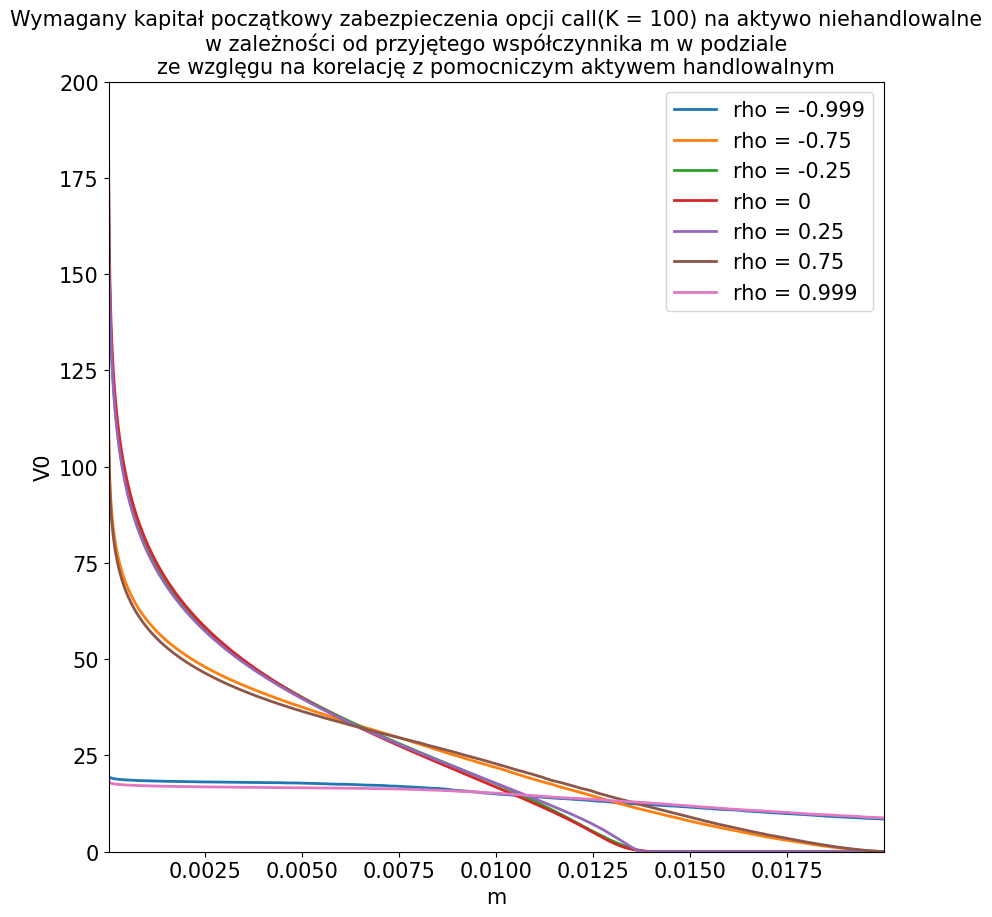

In [113]:
m_s = np.arange(0.00001, 0.02, 0.00001)
plt.figure(figsize=(10,10))
plt.xlabel('m', size = 15)
plt.xlim([np.min(m_s), np.max(m_s)])    
plt.xticks(size = 15)
plt.ylabel('V0', size = 15)
plt.ylim([0, 200])
plt.yticks(size = 15)
for num, rho in enumerate(rho_call):
    prices = []
    for m in tqdm(m_s):
        rho_call[rho].m = m
        V0 = rho_call[rho].get_MC_price(X0_t, X0_nt)
        prices.append(V0)
    plt.plot(m_s, prices, lw = 2, label = f'rho = {rho}')
plt.legend(fontsize = 15)
plt.title(f'Wymagany kapitał początkowy zabezpieczenia opcji call(K = {K}) na aktywo niehandlowalne\nw zależności od przyjętego współczynnika m w podziale\nze wzglęgu na korelację z pomocniczym aktywem handlowalnym',size = 15)


100%|██████████████████████████████████████| 1999/1999 [00:10<00:00, 196.60it/s]


Text(0.5, 1.0, 'Wymagany kapitał początkowy zabezpieczenia opcji put(K = 100) na aktywo niehandlowalne\nw zależności od przyjętego współczynnika m w podziale\nze wzglęgu na korelację z pomocniczym aktywem handlowalnym')

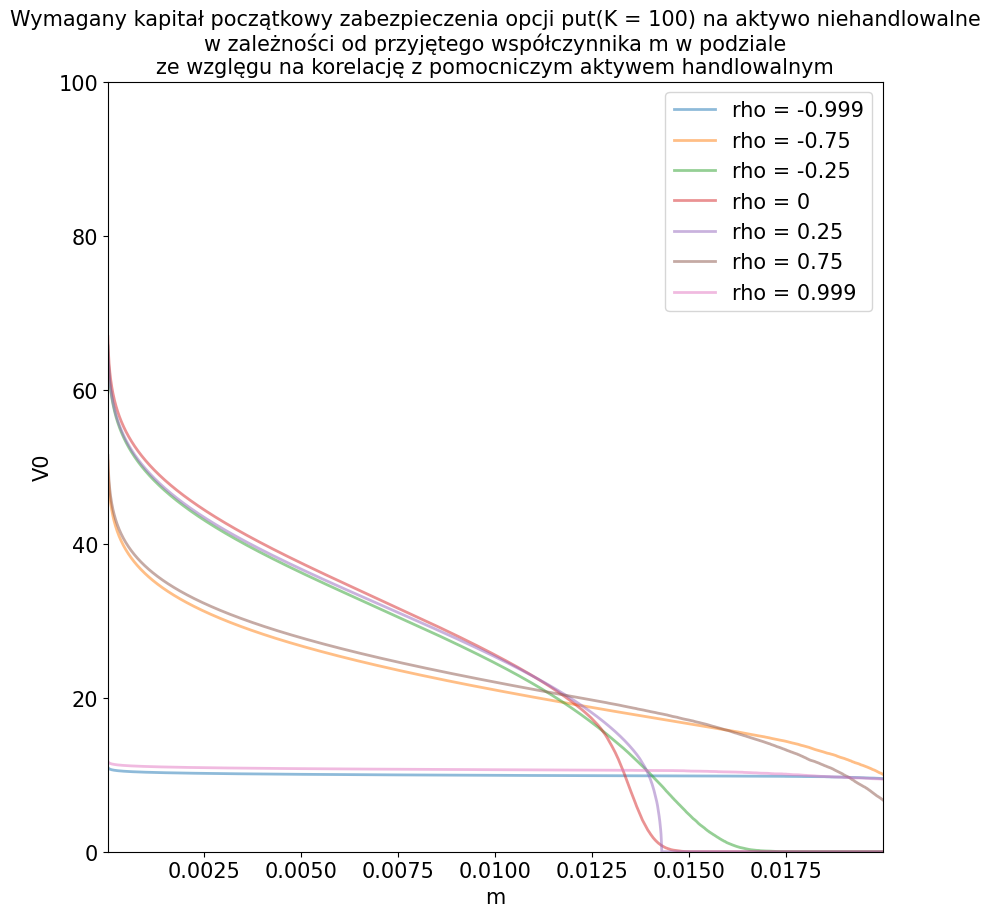

In [115]:
m_s = np.arange(0.00001, 0.02, 0.00001)
plt.figure(figsize=(10,10))
plt.xlabel('m', size = 15)
plt.xlim([np.min(m_s), np.max(m_s)])    
plt.xticks(size = 15)
plt.ylabel('V0', size = 15)
plt.ylim([0, 100])
plt.yticks(size = 15)
for num, rho in enumerate(rho_put):
    prices = []
    for m in tqdm(m_s):
        rho_put[rho].m = m
        V0 = rho_put[rho].get_MC_price(X0_t, X0_nt)
        prices.append(V0)
    plt.plot(m_s, prices, lw = 2, label = f'rho = {rho}', alpha = 0.5)
plt.legend(fontsize = 15)
plt.title(f'Wymagany kapitał początkowy zabezpieczenia opcji put(K = {K}) na aktywo niehandlowalne\nw zależności od przyjętego współczynnika m w podziale\nze wzglęgu na korelację z pomocniczym aktywem handlowalnym',size = 15)


## TU ANIMACJE

## TU TEŻ

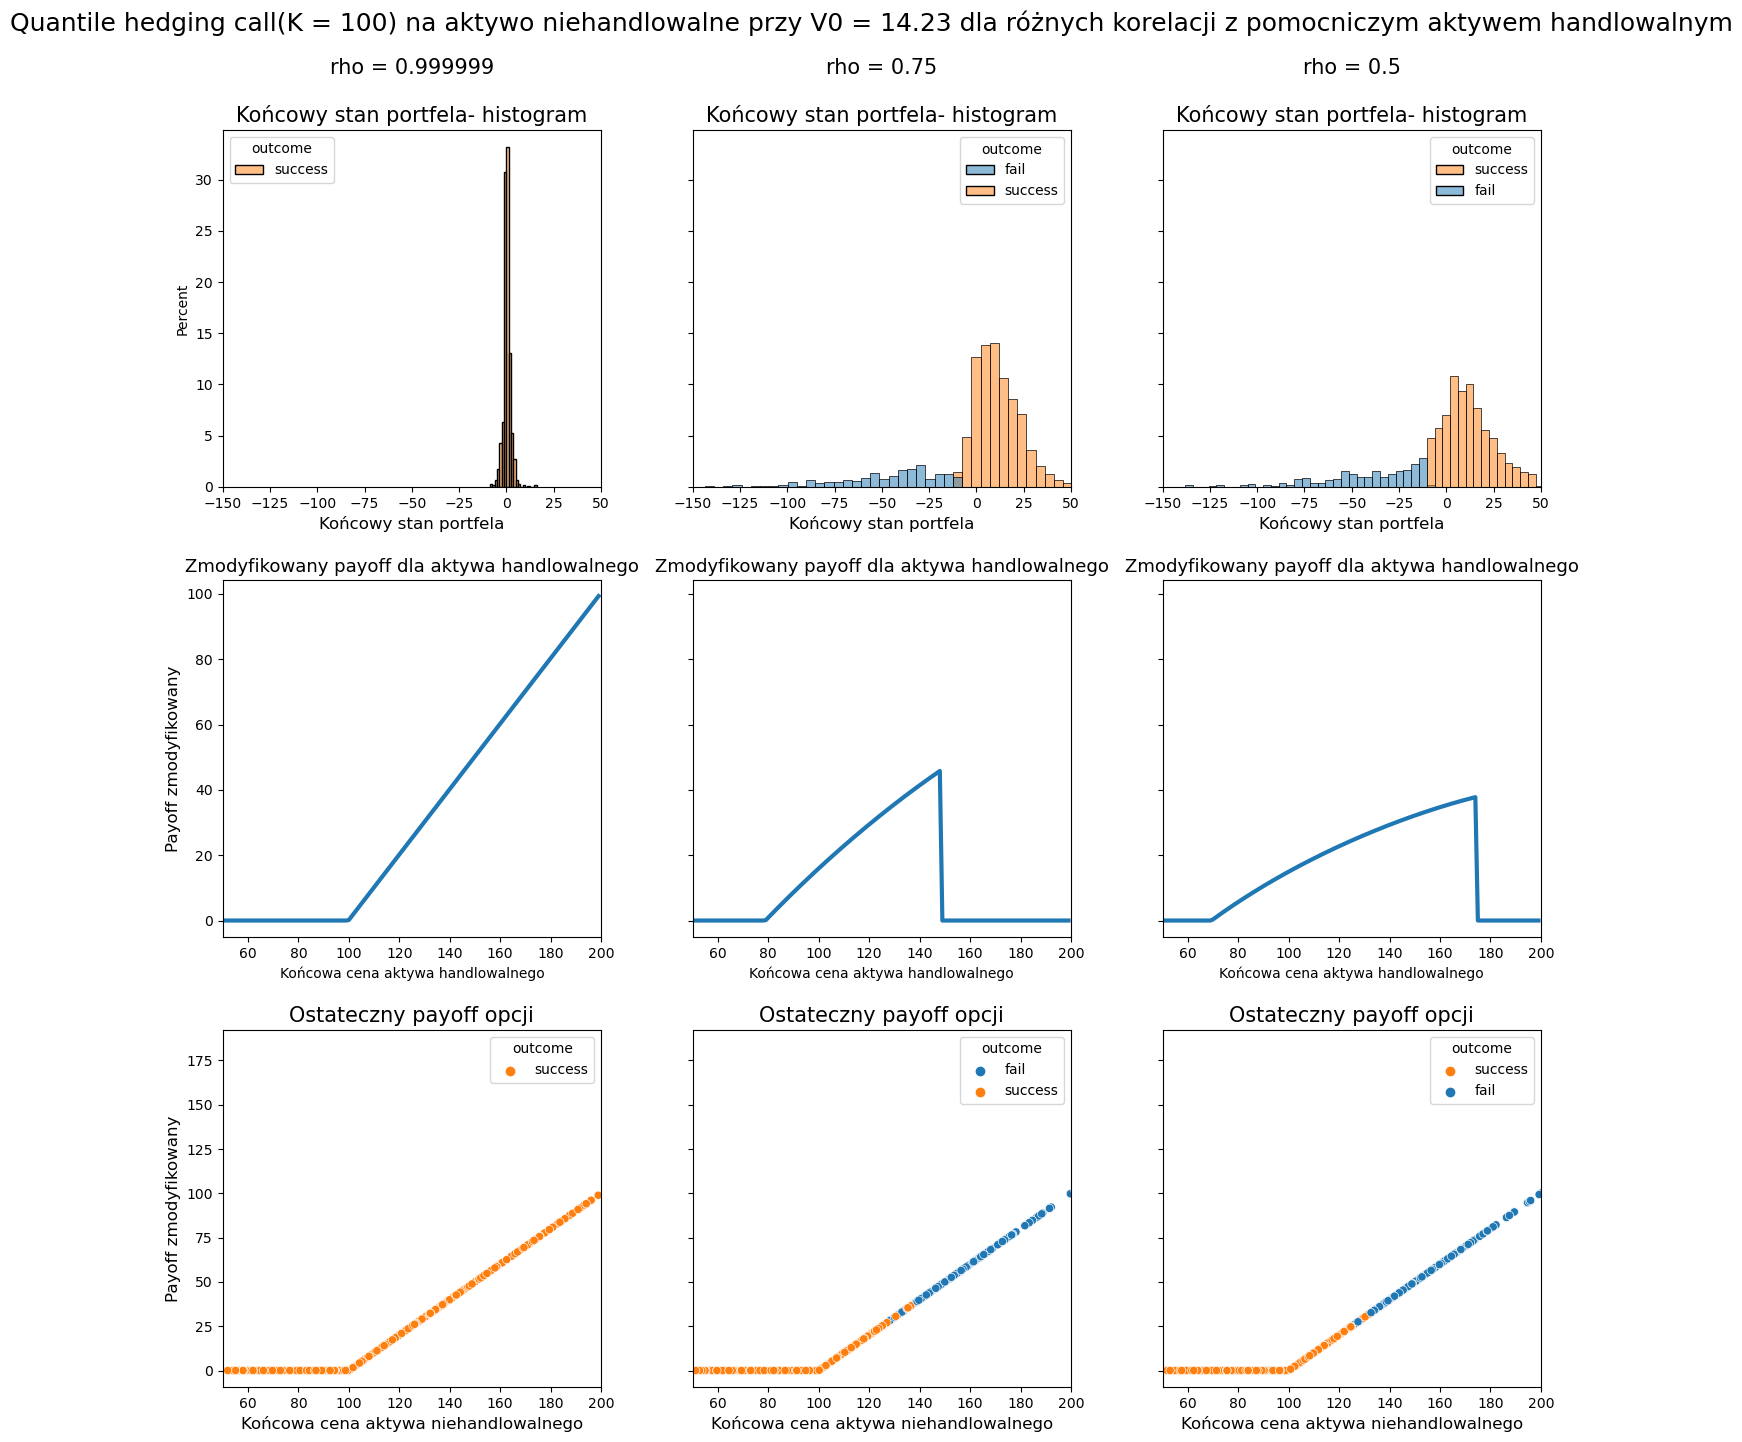

In [47]:
fig, axs = plt.subplots(3,3, figsize = (15, 15), sharey = 'row')
fig.tight_layout(pad=5.0)
repeat = 1000
V0 = call_vanilla.get_price(X0_nt) 
for idx, rho in enumerate([0.999999, 0.75, 0.5]):
    underlying_nt = NonTradedUnderlying(mu_t, sigma_t, underlying_t, rho)
    [_, reality_t], [_, reality_nt] = underlying_nt.simulate_together_P(repeat, T)
    
    call_nt = Vanilla_on_NonTraded(underlying_nt, K, T, True)
    call_nt.set_m(V0, X0_t, X0_nt)
    sims_t = pd.DataFrame(np.ones(150), columns = [0])
    sims_t[1] = np.arange(50, 200) / X0_t
    payoff = call_nt.payoff_special((X0_t * sims_t), X0_nt)

    money_time_call = pd.DataFrame(np.zeros(reality_t.shape))
    delta_time_call = pd.DataFrame(np.zeros(reality_t.shape))
    with Pool(8) as p:
            results = p.map(lambda i: trader_loop(i, call_nt, V0, (X0_t*reality_t), (X0_nt*reality_nt)) , np.arange(0,repeat))
    for num, item in enumerate(results):
        money_time_call.loc[num] = item[0]
        delta_time_call.loc[num] = item[1]   
    money_time_call_outcome = money_time_call.copy()
    money_time_call_outcome['outcome'] = money_time_call.apply(lambda row: 'success' if row.iloc[-1] >= - 10 else 'fail', axis = 1)
    sb.histplot(ax = axs[0, idx], x = money_time_call_outcome[underlying_nt.values_per_year * T], bins = 50 if abs(rho) < 0.9 else 20, hue = money_time_call_outcome['outcome'], palette = {'fail':'tab:blue','success':'tab:orange'}, legend = True, stat = 'percent')
    axs[0, idx].set_xlim([-150, 50])        
    axs[0, idx].set_title(f'rho = {rho}\n\nKońcowy stan portfela- histogram', fontsize = 15)
    axs[0, idx].set_xlabel('Końcowy stan portfela', fontsize = 12)
    axs[1, idx].plot((X0_t * sims_t).iloc[:,-1], payoff, lw = 3)
    axs[1, idx].set_title('Zmodyfikowany payoff dla aktywa handlowalnego', fontsize = 13)
    axs[1, idx].set_xlim([50,200])    
    axs[1, idx].set_xlabel('Końcowa cena aktywa handlowalnego')
    sb.scatterplot(ax = axs[2, idx], x = (X0_nt*reality_nt).iloc[:,-1], y = np.maximum((X0_nt*reality_nt)[underlying_nt.values_per_year * T] - K,0), hue = money_time_call_outcome['outcome'], palette = {'fail':'tab:blue','success':'tab:orange'}).set_title('Ostateczny payoff opcji', fontsize = 15)
    axs[2, idx].set_xlim([50,200])    
    axs[2, idx].set_xlabel('Końcowa cena aktywa niehandlowalnego', fontsize = 12)
    if idx == 0:
        axs[1, idx].set_ylabel('Payoff zmodyfikowany', fontsize = 12)    
        axs[2, idx].set_ylabel('Payoff zmodyfikowany', fontsize = 12)    
plt.suptitle(f'Quantile hedging call(K = {K}) na aktywo niehandlowalne przy V0 = {V0:.2f} dla różnych korelacji z pomocniczym aktywem handlowalnym', fontsize= 18)
plt.subplots_adjust(top=0.9)


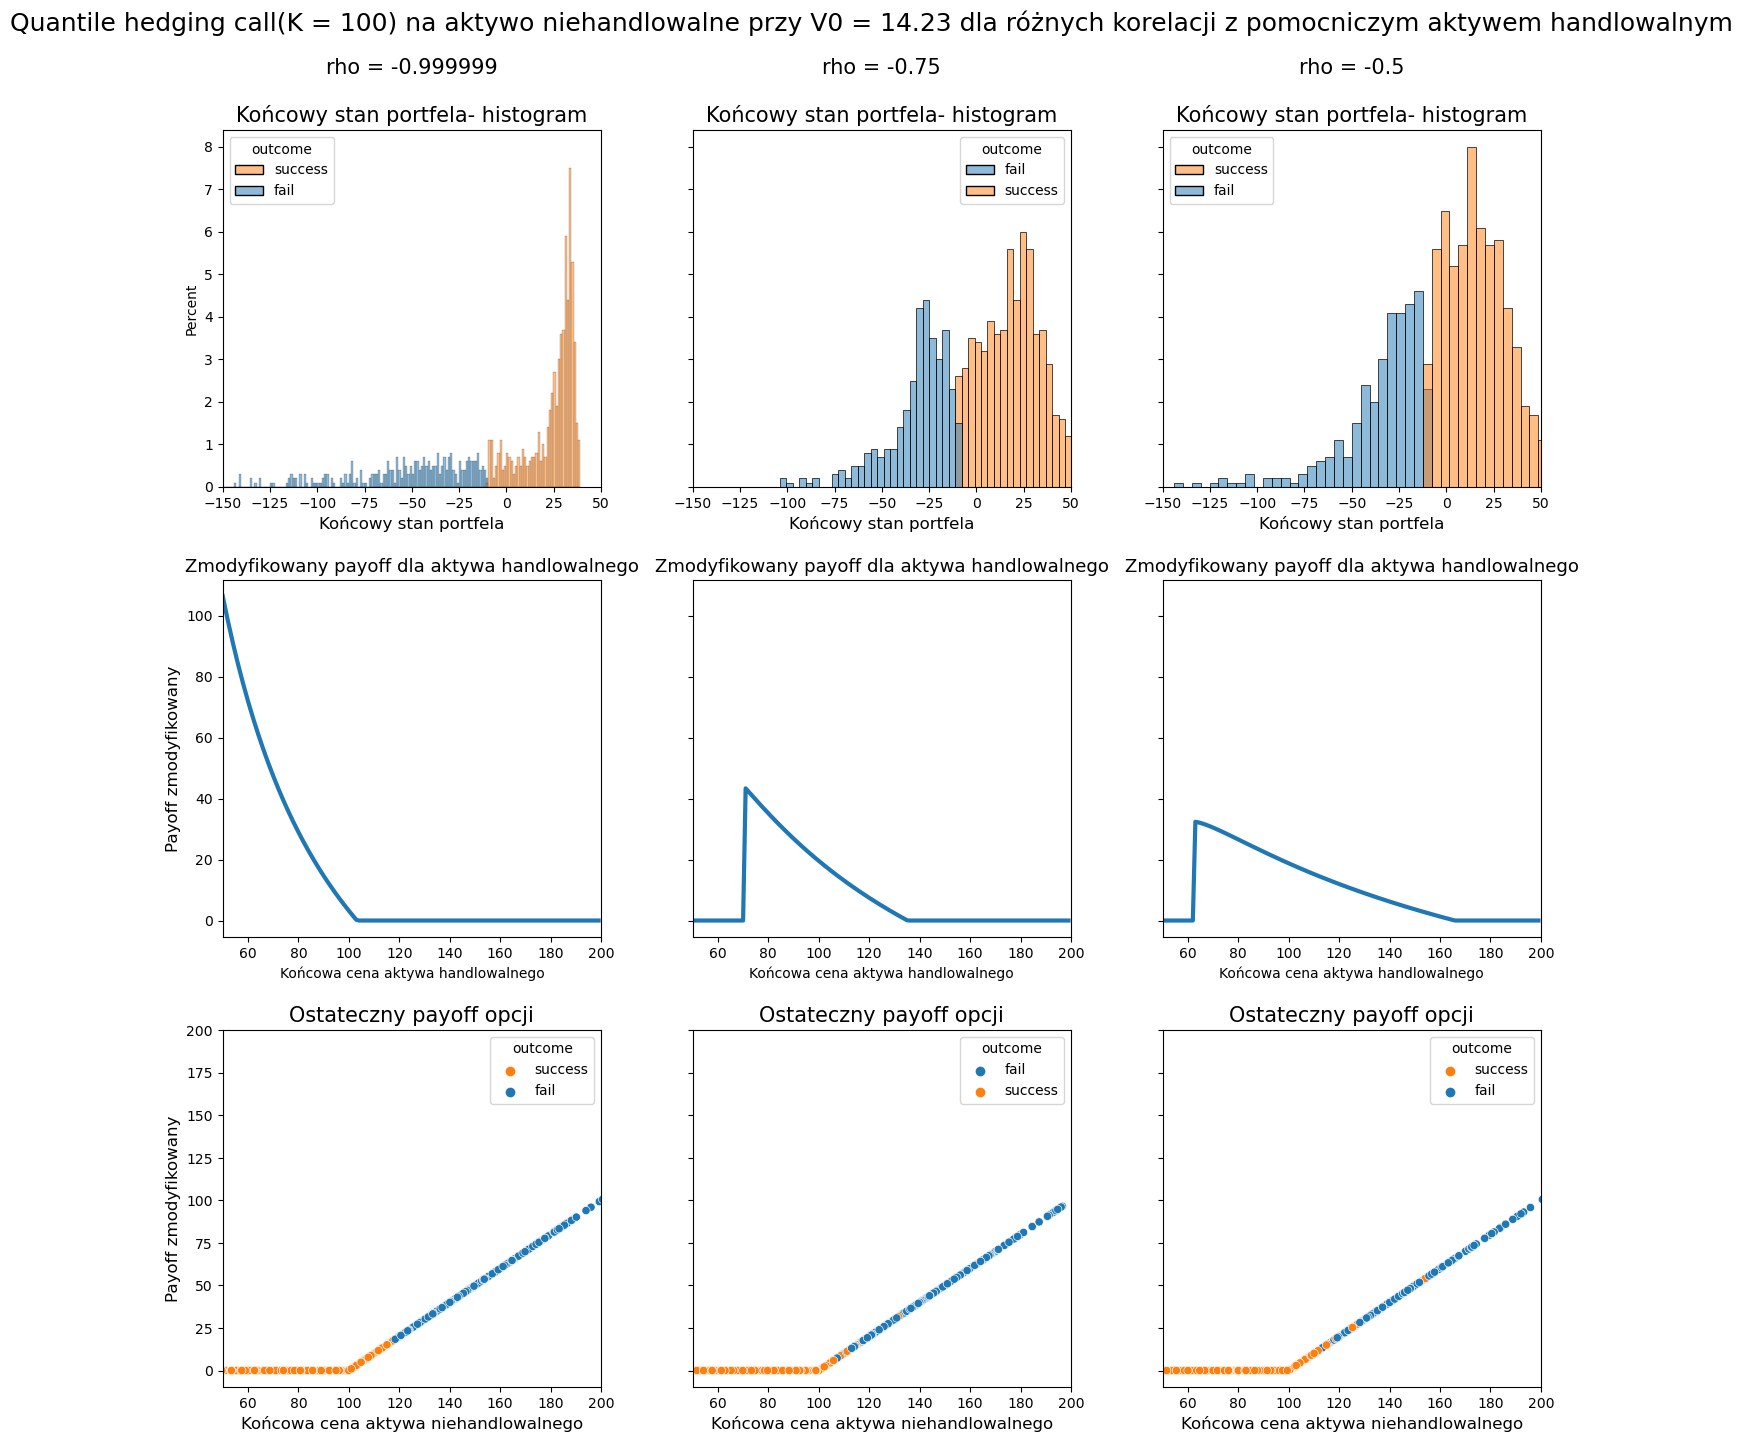

In [70]:
fig, axs = plt.subplots(3,3, figsize = (15, 15), sharey = 'row')
fig.tight_layout(pad=5.0)
repeat = 1000
V0 = call_vanilla.get_price(X0_nt) 
for idx, rho in enumerate([-0.999999, -0.75, -0.5]):
    underlying_nt = NonTradedUnderlying(mu_t, sigma_t, underlying_t, rho)
    [_, reality_t], [_, reality_nt] = underlying_nt.simulate_together_P(repeat, T)
    
    call_nt = Vanilla_on_NonTraded(underlying_nt, K, T, True)
    call_nt.set_m(V0, X0_t, X0_nt)
    sims_t = pd.DataFrame(np.ones(150), columns = [0])
    sims_t[1] = np.arange(50, 200) / X0_t
    payoff = call_nt.payoff_special((X0_t * sims_t), X0_nt)

    money_time_call = pd.DataFrame(np.zeros(reality_t.shape))
    delta_time_call = pd.DataFrame(np.zeros(reality_t.shape))
    with Pool(8) as p:
            results = p.map(lambda i: trader_loop(i, call_nt, V0, (X0_t*reality_t), (X0_nt*reality_nt)) , np.arange(0,repeat))
    for num, item in enumerate(results):
        money_time_call.loc[num] = item[0]
        delta_time_call.loc[num] = item[1]   
    money_time_call_outcome = money_time_call.copy()
    money_time_call_outcome['outcome'] = money_time_call.apply(lambda row: 'success' if row.iloc[-1] >= - 10 else 'fail', axis = 1)
    sb.histplot(ax = axs[0, idx], x = money_time_call_outcome[underlying_nt.values_per_year * T], bins = 50 if abs(rho) < 0.9 else 200, hue = money_time_call_outcome['outcome'], palette = {'fail':'tab:blue','success':'tab:orange'}, legend = True, stat = 'percent')
    axs[0, idx].set_xlim([-150, 50])        
    axs[0, idx].set_title(f'rho = {rho}\n\nKońcowy stan portfela- histogram', fontsize = 15)
    axs[0, idx].set_xlabel('Końcowy stan portfela', fontsize = 12)
    axs[1, idx].plot((X0_t * sims_t).iloc[:,-1], payoff, lw = 3)
    axs[1, idx].set_title('Zmodyfikowany payoff dla aktywa handlowalnego', fontsize = 13)
    axs[1, idx].set_xlim([50,200])    
    axs[1, idx].set_xlabel('Końcowa cena aktywa handlowalnego')
    sb.scatterplot(ax = axs[2, idx], x = (X0_nt*reality_nt).iloc[:,-1], y = np.maximum((X0_nt*reality_nt)[underlying_nt.values_per_year * T] - K,0), hue = money_time_call_outcome['outcome'], palette = {'fail':'tab:blue','success':'tab:orange'}).set_title('Ostateczny payoff opcji', fontsize = 15)
    axs[2, idx].set_xlim([50,200])    
    axs[2, idx].set_xlabel('Końcowa cena aktywa niehandlowalnego', fontsize = 12)
    if idx == 0:
        axs[1, idx].set_ylabel('Payoff zmodyfikowany', fontsize = 12)    
        axs[2, idx].set_ylabel('Payoff zmodyfikowany', fontsize = 12)    
plt.suptitle(f'Quantile hedging call(K = {K}) na aktywo niehandlowalne przy V0 = {V0:.2f} dla różnych korelacji z pomocniczym aktywem handlowalnym', fontsize= 18)
plt.subplots_adjust(top=0.9)


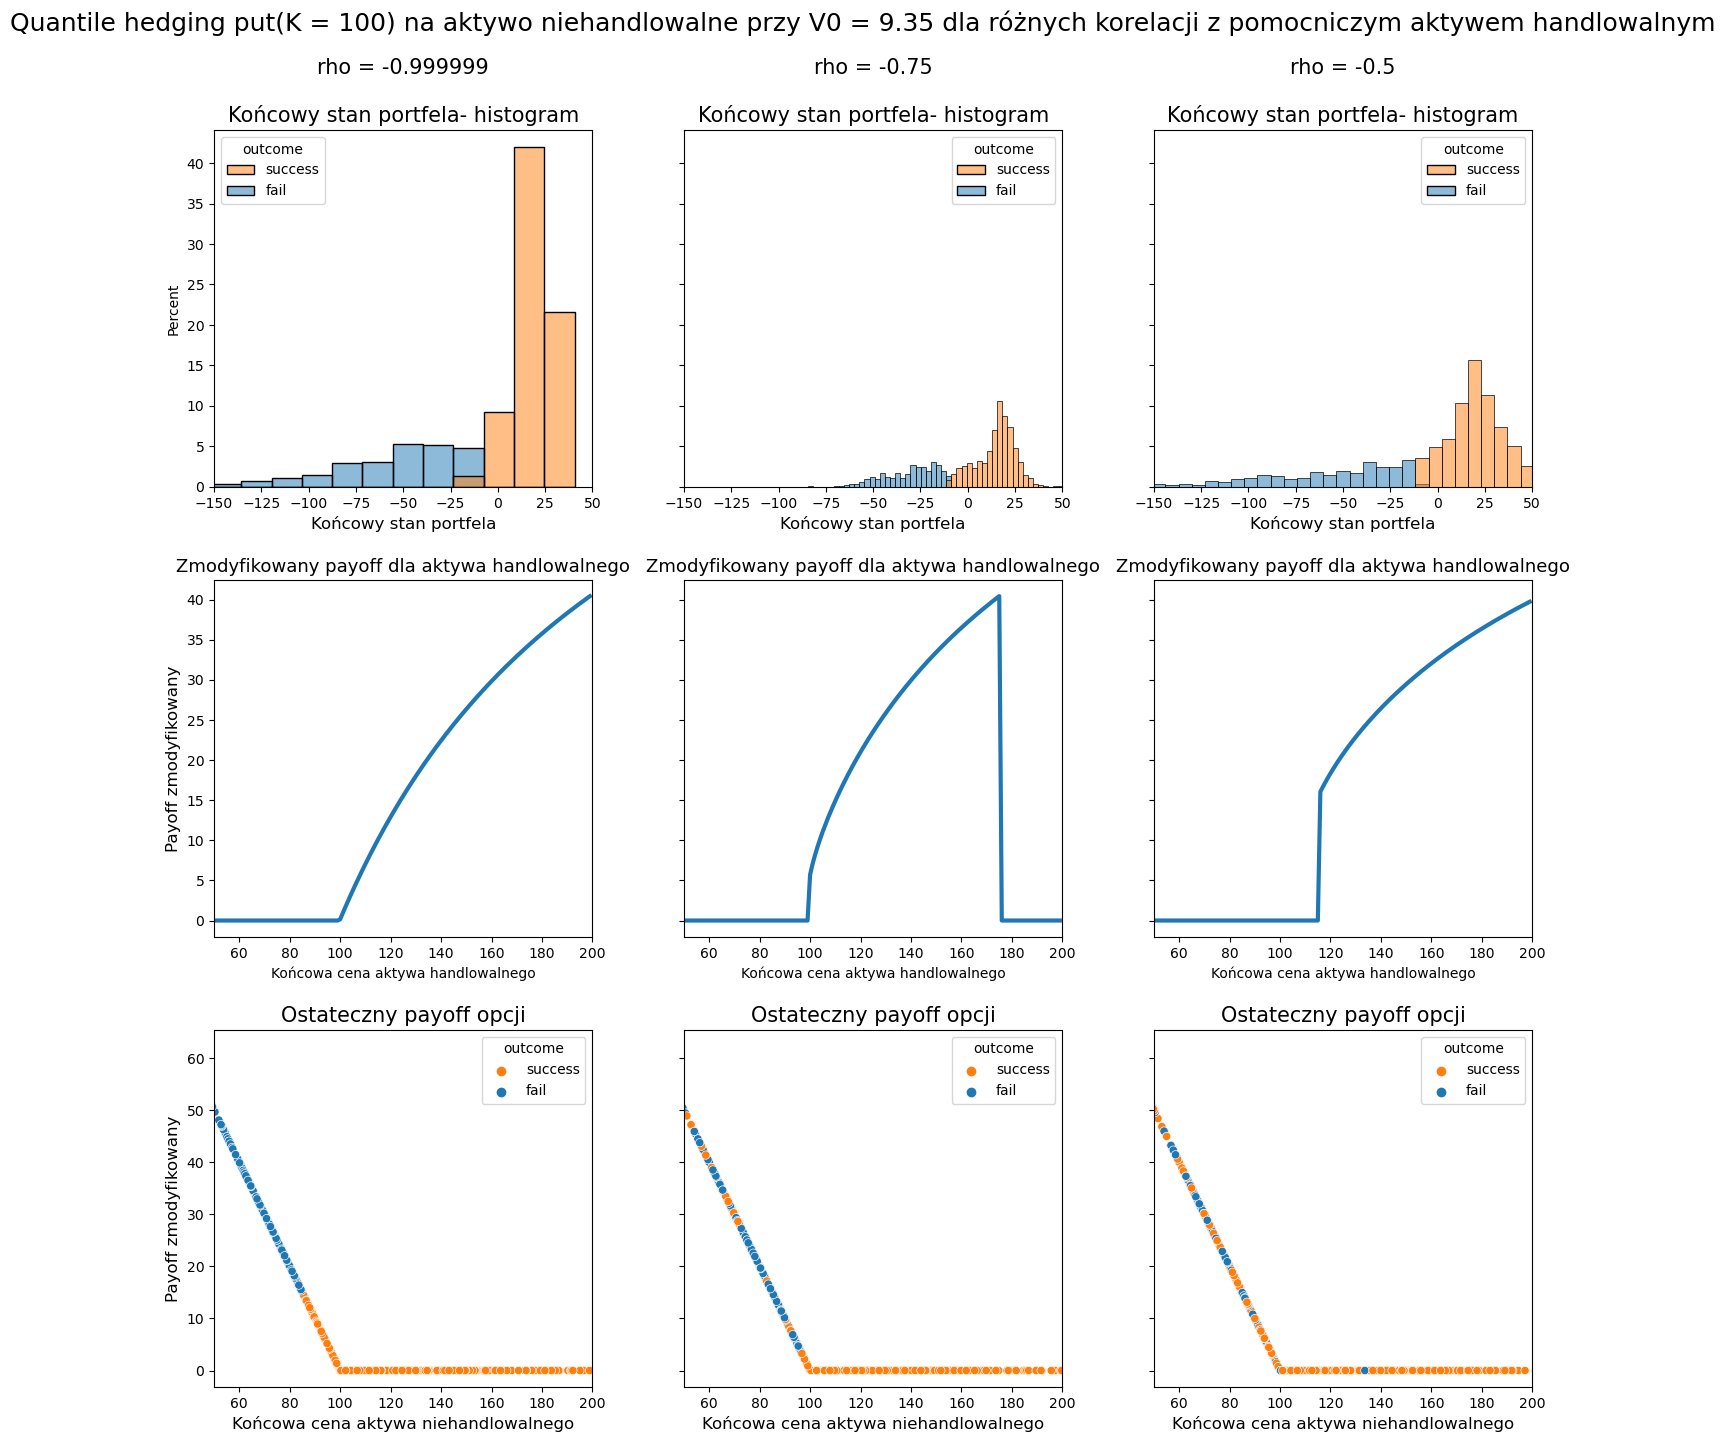

In [94]:
fig, axs = plt.subplots(3,3, figsize = (15, 15), sharey = 'row')
fig.tight_layout(pad=5.0)
repeat = 1000
V0 = put_vanilla.get_price(X0_nt) 
for idx, rho in enumerate([-0.999999, -0.75, -0.5]):
    underlying_nt = NonTradedUnderlying(mu_t, sigma_t, underlying_t, rho)
    [_, reality_t], [_, reality_nt] = underlying_nt.simulate_together_P(repeat, T)
    
    put_nt = Vanilla_on_NonTraded(underlying_nt, K, T, False)
    put_nt.set_m(V0, X0_t, X0_nt)
    sims_t = pd.DataFrame(np.ones(150), columns = [0])
    sims_t[1] = np.arange(50, 200) / X0_t
    payoff = put_nt.payoff_special((X0_t * sims_t), X0_nt)

    money_time_put = pd.DataFrame(np.zeros(reality_t.shape))
    delta_time_put = pd.DataFrame(np.zeros(reality_t.shape))
    with Pool(8) as p:
            results = p.map(lambda i: trader_loop(i, put_nt, V0, (X0_t*reality_t), (X0_nt*reality_nt)) , np.arange(0,repeat))
    for num, item in enumerate(results):
        money_time_put.loc[num] = item[0]
        delta_time_put.loc[num] = item[1]   
    money_time_put_outcome = money_time_put.copy()
    money_time_put_outcome['outcome'] = money_time_put.apply(lambda row: 'success' if row.iloc[-1] >= - 10 else 'fail', axis = 1)
    sb.histplot(ax = axs[0, idx], x = money_time_put_outcome[underlying_nt.values_per_year * T], bins = 50 if abs(rho) < 0.9 else 20, hue = money_time_put_outcome['outcome'], palette = {'fail':'tab:blue','success':'tab:orange'}, legend = True, stat = 'percent')
    axs[0, idx].set_xlim([-150, 50])        
    axs[0, idx].set_title(f'rho = {rho}\n\nKońcowy stan portfela- histogram', fontsize = 15)
    axs[0, idx].set_xlabel('Końcowy stan portfela', fontsize = 12)
    axs[1, idx].plot((X0_t * sims_t).iloc[:,-1], payoff, lw = 3)
    axs[1, idx].set_title('Zmodyfikowany payoff dla aktywa handlowalnego', fontsize = 13)
    axs[1, idx].set_xlim([50,200])    
    axs[1, idx].set_xlabel('Końcowa cena aktywa handlowalnego')
    sb.scatterplot(ax = axs[2, idx], x = (X0_nt*reality_nt).iloc[:,-1], y = np.maximum(K - (X0_nt*reality_nt)[underlying_nt.values_per_year * T],0), hue = money_time_put_outcome['outcome'], palette = {'fail':'tab:blue','success':'tab:orange'}).set_title('Ostateczny payoff opcji', fontsize = 15)
    axs[2, idx].set_xlim([50,200])    
    axs[2, idx].set_xlabel('Końcowa cena aktywa niehandlowalnego', fontsize = 12)
    if idx == 0:
        axs[1, idx].set_ylabel('Payoff zmodyfikowany', fontsize = 12)    
        axs[2, idx].set_ylabel('Payoff zmodyfikowany', fontsize = 12)    
plt.suptitle(f'Quantile hedging put(K = {K}) na aktywo niehandlowalne przy V0 = {V0:.2f} dla różnych korelacji z pomocniczym aktywem handlowalnym', fontsize= 18)
plt.subplots_adjust(top=0.9)


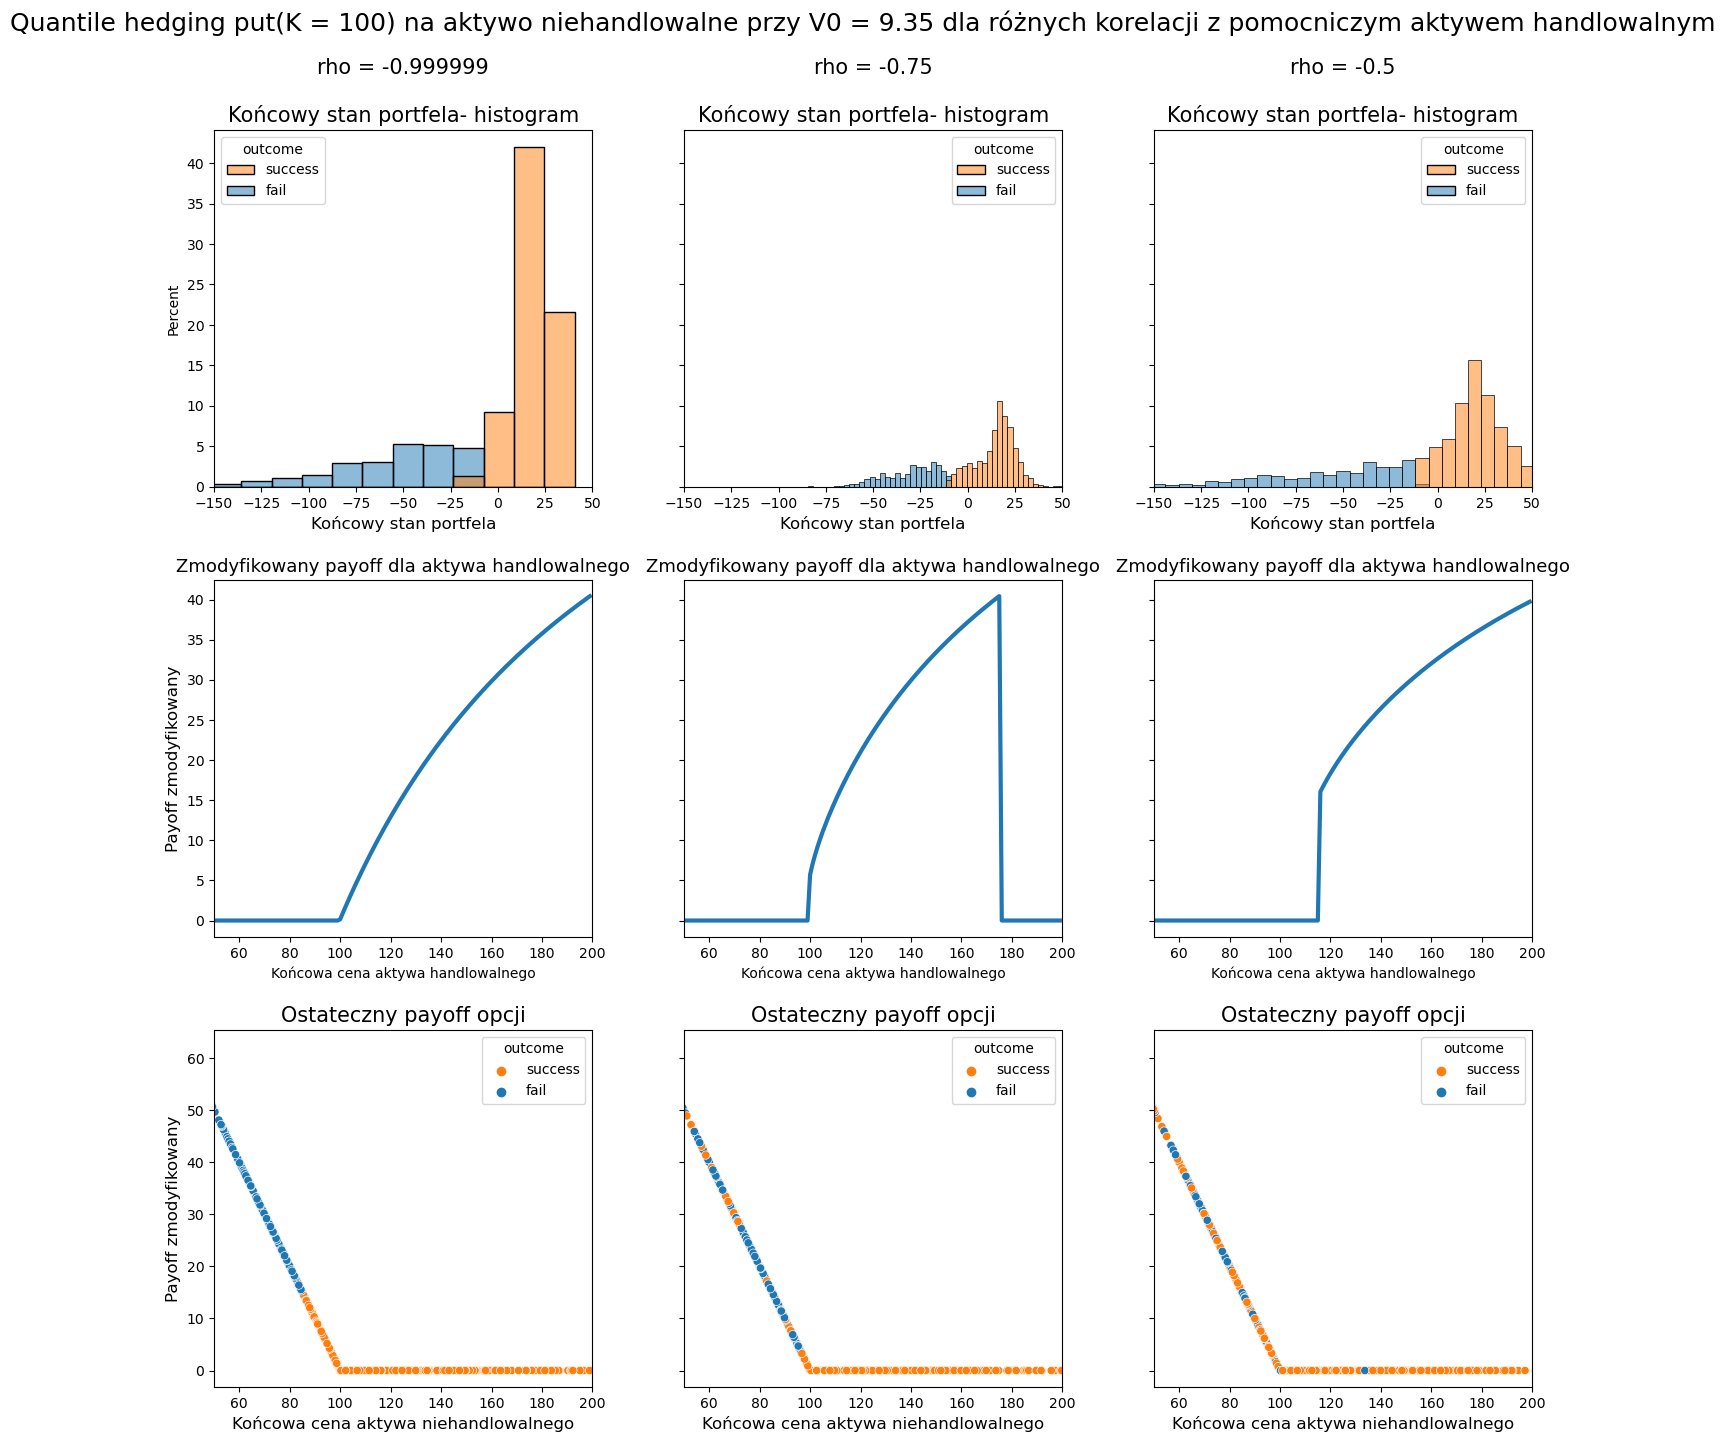

In [94]:
fig, axs = plt.subplots(3,3, figsize = (15, 15), sharey = 'row')
fig.tight_layout(pad=5.0)
repeat = 1000
V0 = put_vanilla.get_price(X0_nt) 
for idx, rho in enumerate([-0.999999, -0.75, -0.5]):
    underlying_nt = NonTradedUnderlying(mu_t, sigma_t, underlying_t, rho)
    [_, reality_t], [_, reality_nt] = underlying_nt.simulate_together_P(repeat, T)
    
    put_nt = Vanilla_on_NonTraded(underlying_nt, K, T, False)
    put_nt.set_m(V0, X0_t, X0_nt)
    sims_t = pd.DataFrame(np.ones(150), columns = [0])
    sims_t[1] = np.arange(50, 200) / X0_t
    payoff = put_nt.payoff_special((X0_t * sims_t), X0_nt)

    money_time_put = pd.DataFrame(np.zeros(reality_t.shape))
    delta_time_put = pd.DataFrame(np.zeros(reality_t.shape))
    with Pool(8) as p:
            results = p.map(lambda i: trader_loop(i, put_nt, V0, (X0_t*reality_t), (X0_nt*reality_nt)) , np.arange(0,repeat))
    for num, item in enumerate(results):
        money_time_put.loc[num] = item[0]
        delta_time_put.loc[num] = item[1]   
    money_time_put_outcome = money_time_put.copy()
    money_time_put_outcome['outcome'] = money_time_put.apply(lambda row: 'success' if row.iloc[-1] >= - 10 else 'fail', axis = 1)
    sb.histplot(ax = axs[0, idx], x = money_time_put_outcome[underlying_nt.values_per_year * T], bins = 50 if abs(rho) < 0.9 else 20, hue = money_time_put_outcome['outcome'], palette = {'fail':'tab:blue','success':'tab:orange'}, legend = True, stat = 'percent')
    axs[0, idx].set_xlim([-150, 50])        
    axs[0, idx].set_title(f'rho = {rho}\n\nKońcowy stan portfela- histogram', fontsize = 15)
    axs[0, idx].set_xlabel('Końcowy stan portfela', fontsize = 12)
    axs[1, idx].plot((X0_t * sims_t).iloc[:,-1], payoff, lw = 3)
    axs[1, idx].set_title('Zmodyfikowany payoff dla aktywa handlowalnego', fontsize = 13)
    axs[1, idx].set_xlim([50,200])    
    axs[1, idx].set_xlabel('Końcowa cena aktywa handlowalnego')
    sb.scatterplot(ax = axs[2, idx], x = (X0_nt*reality_nt).iloc[:,-1], y = np.maximum(K - (X0_nt*reality_nt)[underlying_nt.values_per_year * T],0), hue = money_time_put_outcome['outcome'], palette = {'fail':'tab:blue','success':'tab:orange'}).set_title('Ostateczny payoff opcji', fontsize = 15)
    axs[2, idx].set_xlim([50,200])    
    axs[2, idx].set_xlabel('Końcowa cena aktywa niehandlowalnego', fontsize = 12)
    if idx == 0:
        axs[1, idx].set_ylabel('Payoff zmodyfikowany', fontsize = 12)    
        axs[2, idx].set_ylabel('Payoff zmodyfikowany', fontsize = 12)    
plt.suptitle(f'Quantile hedging put(K = {K}) na aktywo niehandlowalne przy V0 = {V0:.2f} dla różnych korelacji z pomocniczym aktywem handlowalnym', fontsize= 18)
plt.subplots_adjust(top=0.9)


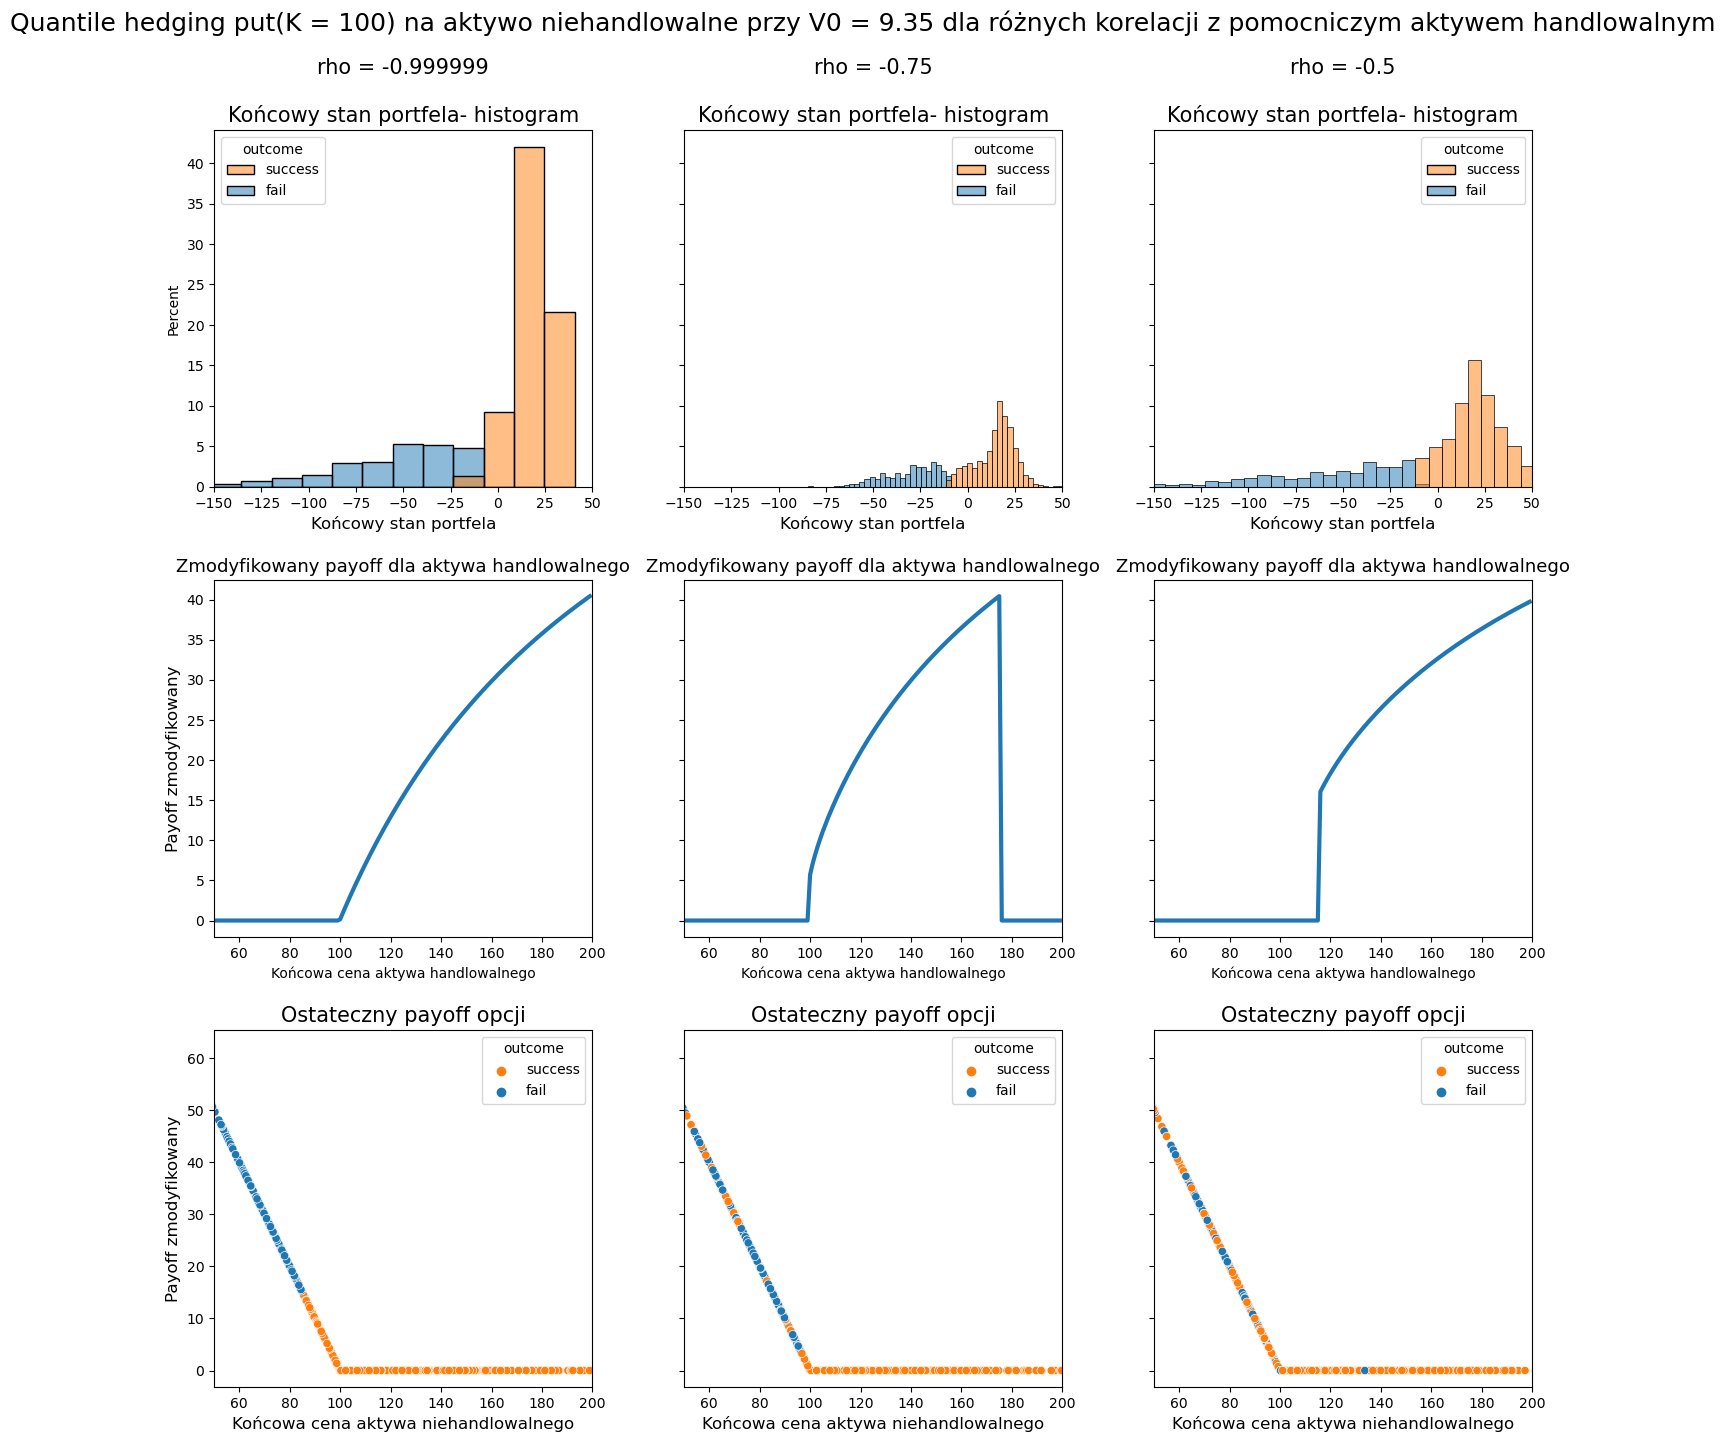

In [94]:
fig, axs = plt.subplots(3,3, figsize = (15, 15), sharey = 'row')
fig.tight_layout(pad=5.0)
repeat = 1000
V0 = put_vanilla.get_price(X0_nt) 
for idx, rho in enumerate([-0.999999, -0.75, -0.5]):
    underlying_nt = NonTradedUnderlying(mu_t, sigma_t, underlying_t, rho)
    [_, reality_t], [_, reality_nt] = underlying_nt.simulate_together_P(repeat, T)
    
    put_nt = Vanilla_on_NonTraded(underlying_nt, K, T, False)
    put_nt.set_m(V0, X0_t, X0_nt)
    sims_t = pd.DataFrame(np.ones(150), columns = [0])
    sims_t[1] = np.arange(50, 200) / X0_t
    payoff = put_nt.payoff_special((X0_t * sims_t), X0_nt)

    money_time_put = pd.DataFrame(np.zeros(reality_t.shape))
    delta_time_put = pd.DataFrame(np.zeros(reality_t.shape))
    with Pool(8) as p:
            results = p.map(lambda i: trader_loop(i, put_nt, V0, (X0_t*reality_t), (X0_nt*reality_nt)) , np.arange(0,repeat))
    for num, item in enumerate(results):
        money_time_put.loc[num] = item[0]
        delta_time_put.loc[num] = item[1]   
    money_time_put_outcome = money_time_put.copy()
    money_time_put_outcome['outcome'] = money_time_put.apply(lambda row: 'success' if row.iloc[-1] >= - 10 else 'fail', axis = 1)
    sb.histplot(ax = axs[0, idx], x = money_time_put_outcome[underlying_nt.values_per_year * T], bins = 50 if abs(rho) < 0.9 else 20, hue = money_time_put_outcome['outcome'], palette = {'fail':'tab:blue','success':'tab:orange'}, legend = True, stat = 'percent')
    axs[0, idx].set_xlim([-150, 50])        
    axs[0, idx].set_title(f'rho = {rho}\n\nKońcowy stan portfela- histogram', fontsize = 15)
    axs[0, idx].set_xlabel('Końcowy stan portfela', fontsize = 12)
    axs[1, idx].plot((X0_t * sims_t).iloc[:,-1], payoff, lw = 3)
    axs[1, idx].set_title('Zmodyfikowany payoff dla aktywa handlowalnego', fontsize = 13)
    axs[1, idx].set_xlim([50,200])    
    axs[1, idx].set_xlabel('Końcowa cena aktywa handlowalnego')
    sb.scatterplot(ax = axs[2, idx], x = (X0_nt*reality_nt).iloc[:,-1], y = np.maximum(K - (X0_nt*reality_nt)[underlying_nt.values_per_year * T],0), hue = money_time_put_outcome['outcome'], palette = {'fail':'tab:blue','success':'tab:orange'}).set_title('Ostateczny payoff opcji', fontsize = 15)
    axs[2, idx].set_xlim([50,200])    
    axs[2, idx].set_xlabel('Końcowa cena aktywa niehandlowalnego', fontsize = 12)
    if idx == 0:
        axs[1, idx].set_ylabel('Payoff zmodyfikowany', fontsize = 12)    
        axs[2, idx].set_ylabel('Payoff zmodyfikowany', fontsize = 12)    
plt.suptitle(f'Quantile hedging put(K = {K}) na aktywo niehandlowalne przy V0 = {V0:.2f} dla różnych korelacji z pomocniczym aktywem handlowalnym', fontsize= 18)
plt.subplots_adjust(top=0.9)


### Druga funkcja celu


$$G_Q(x) = \frac{\partial P}{\partial Q}\mathbb{E} \left( \mathbb{1}_{H \leq V_T} + \frac{V_T}{H}\mathbb{1}_{H \geq V_T} | \widetilde{W_T}\right)$$


In [10]:
W_T_tilde = -1.2
rho = 0.7
delta = 0.1
x_put = np.arange(delta, K, delta)
df_put = pd.DataFrame({ "x" : x_put, "G(x)" : None, "G2(x)" : None, "G'(x)" : None,"G2'(x)" : None})
for i in range(len(x_put)):
    df_put.at[i, "G(x)"] = G_func(df_put.at[i, 'x'], mu_nt, sigma_nt, mu_t, sigma_t, r, T, K, X0_nt, W_T_tilde, rho, type = "put", target_function = 1, derivative = False)
    df_put.at[i, "G2(x)"] = G_func(df_put.at[i, 'x'], mu_nt, sigma_nt, mu_t, sigma_t, r, T, K, X0_nt, W_T_tilde, rho, type = "put", target_function = 2, derivative = False) + 0.002
    df_put.at[i, "G'(x)"] = G_func(df_put.at[i, 'x'], mu_nt, sigma_nt, mu_t, sigma_t, r, T, K, X0_nt, W_T_tilde, rho, type = "put", target_function = 1, derivative = True)
    df_put.at[i, "G2'(x)"] = G_func(df_put.at[i, 'x'], mu_nt, sigma_nt, mu_t, sigma_t, r, T, K, X0_nt, W_T_tilde, rho, type = "put", target_function = 2, derivative = True)

##### Opcja Call
$$a(x) = \left[ \frac{\log{(K+x)}- \log{S_0}- \mu T + \frac{\sigma^2 T}{2} - \rho \sigma \widetilde{W_T}}{\sigma \sqrt{1-\rho^2}}\right] $$

$$G_Q(x) =  F_Q(x) + \frac{\partial P}{\partial Q}  \int_{a(x)}^\infty \dfrac{x}{S_0\exp(\mu T+\sigma \widetilde{W_T} \rho+\sqrt{1-\rho^2} y \sigma - \sigma^2 T/2)-K} f_{W_T}(y)dy$$

### Druga funkcja celu


$$G_Q(x) = \frac{\partial P}{\partial Q}\mathbb{E} \left( \mathbb{1}_{H \leq V_T} + \frac{V_T}{H}\mathbb{1}_{H \geq V_T} | \widetilde{W_T}\right)$$


##### Opcja put
$$b(x) = \left[ \frac{\log{(K-x)}- \log{S_0}- \mu T + \frac{\sigma^2 T}{2} - \rho \sigma \widetilde{W_T}}{\sigma \sqrt{1-\rho^2}}\right] $$

$$G_Q(x) =  F_Q(x) + \frac{\partial P}{\partial Q}  \int_{-\infty}^b(x) \dfrac{x}{K - S_0\exp(\mu T+\sigma \widetilde{W_T} \rho+\sqrt{1-\rho^2} y \sigma - \sigma^2 T/2)} f_{W_T}(y)dy$$

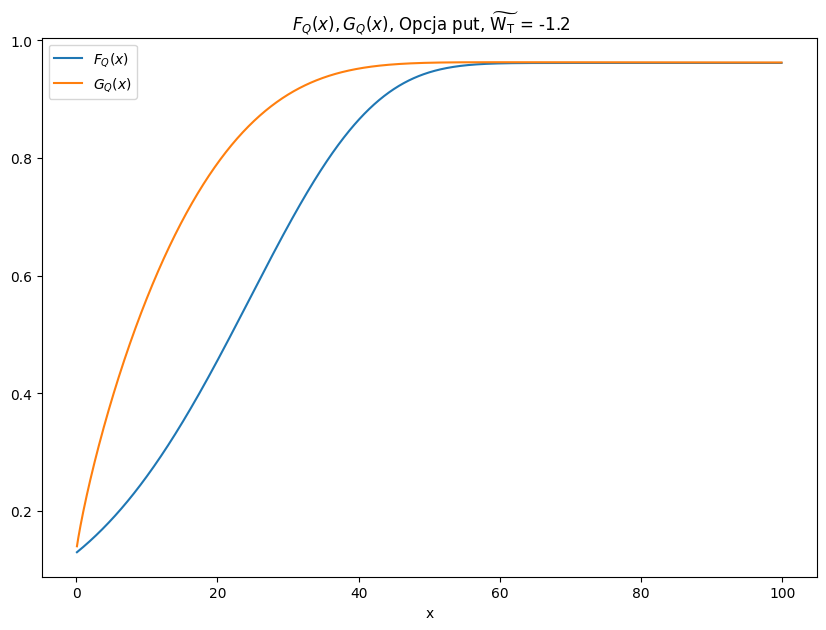

In [32]:
fig, ax = plt.subplots(1,1, figsize = (10, 7))

ax.plot(df_put['x'],df_put['G(x)'], label = "$F_Q(x)$")
ax.plot(df_put['x'],df_put['G2(x)'], label = "$G_Q(x)$")
ax.set_title(" $F_Q(x), G_Q(x)$, Opcja put, $\widetilde{\mathregular{W_T}}$ = -1.2")
ax.set_xlabel('x')

ax.legend(loc='upper left')
plt.show()

#### Pochodne

##### Opcja Call
$$a(x) = \left[ \frac{\log{(K+x)}- \log{S_0}- \mu T + \frac{\sigma^2 T}{2} - \rho \sigma \widetilde{W_T}}{\sigma \sqrt{1-\rho^2}}\right] $$


$$G_Q'(x) = \frac{\partial P}{\partial Q}  \left[ \int_{a(x)}^\infty \dfrac{1}{S_0\exp(\mu T+\sigma \widetilde{W_T} \rho+\sqrt{1-\rho^2} y \sigma - \sigma^2 T/2)-K} f_{W_T}(y)dy  \right] $$

##### Opcja put
$$b(x) = \left[ \frac{\log{(K-x)}- \log{S_0}- \mu T + \frac{\sigma^2 T}{2} - \rho \sigma \widetilde{W_T}}{\sigma \sqrt{1-\rho^2}}\right] $$
$$G'_Q(x) =  \frac{\partial P}{\partial Q}  \int_{-\infty}^{b(x)} \dfrac{1}{K - S_0\exp(\mu T+\sigma \widetilde{W_T} \rho+\sqrt{1-\rho^2} y \sigma - \sigma^2 T/2)} f_{W_T}(y)dy$$

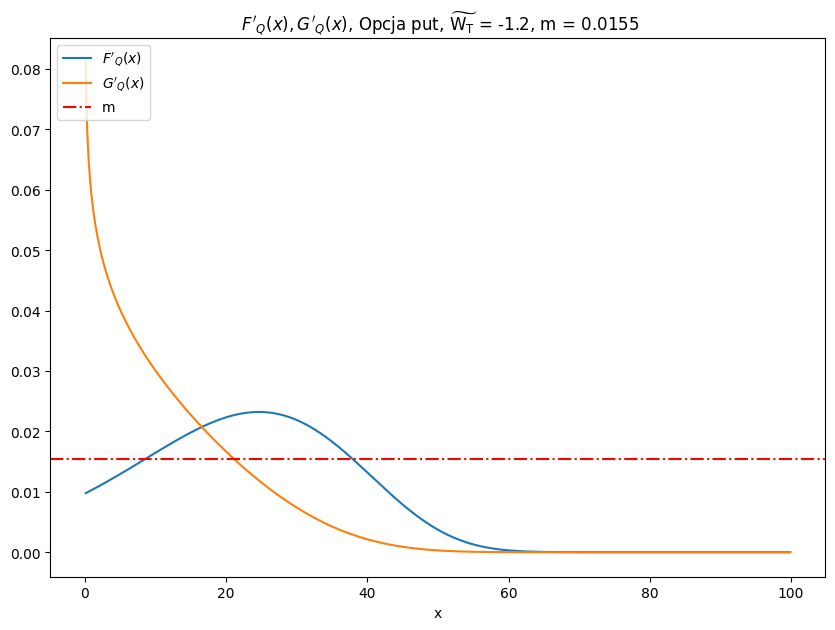

In [14]:
fig, ax = plt.subplots(1,1, figsize = (10, 7))

ax.plot(df_put['x'],df_put["G'(x)"], label = "$F'_Q(x)$")
ax.plot(df_put['x'],df_put["G2'(x)"], label = "$G'_Q(x)$")
ax.set_title(" $F'_Q(x), G'_Q(x)$, Opcja put, $\widetilde{\mathregular{W_T}}$ = -1.2, m = 0.0155")
ax.set_xlabel('x')
plt.axhline(y = 0.0155, color = 'r', linestyle = 'dashdot', label = "m")
ax.legend(loc='upper left')
plt.show()

In [12]:
m = 0.0155

xG = find_x(m, W_T_tilde, mu_nt, sigma_nt, mu_t, sigma_t, r, T, K, X0_nt,  rho, type = 'put', target_function = 2,  left_bound = 0.01,eps = 0.1 ** 10, right_bound = 100, arg_inf = 120)
dfG = plot_line_G(xG, m, mu_nt, sigma_nt, mu_t, sigma_t, r, T, K, X0_nt, W_T_tilde, rho, type = 'put', x_range = 200,target_function = 2)

xF = find_x(m, W_T_tilde, mu_nt, sigma_nt, mu_t, sigma_t, r, T, K, X0_nt,  rho, type = 'put', target_function = 1,  left_bound = 0.01,eps = 0.1 ** 10, right_bound = 100, arg_inf = 120)
dfF = plot_line_G(xF, m, mu_nt, sigma_nt, mu_t, sigma_t, r, T, K, X0_nt, W_T_tilde, rho, type = 'put', target_function = 1,x_range = 200)
(xG,xF)

(21.04509822196142, 37.84072633593655)

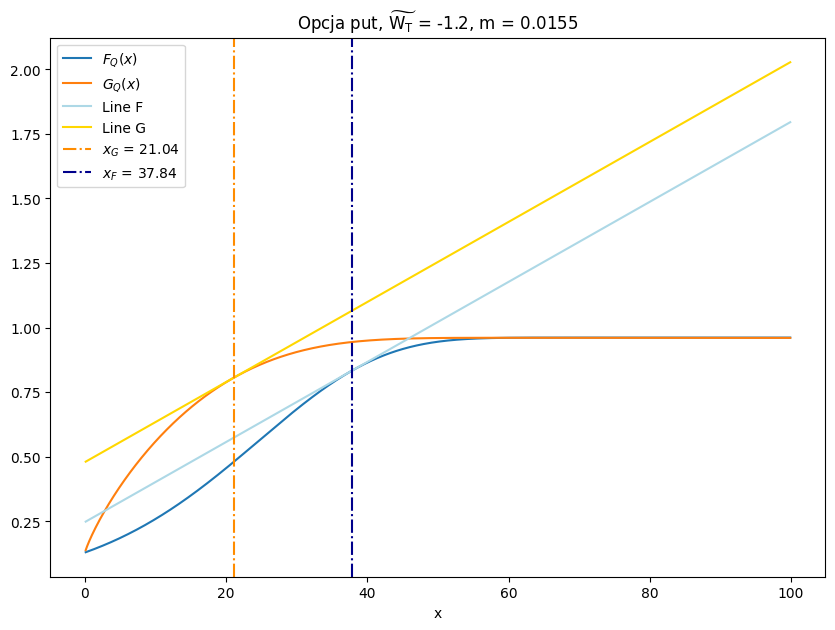

In [13]:
fig, ax = plt.subplots(1,1, figsize = (10, 7))
ax.plot(dfF["x"],dfF["G(x)"], label = "$F_Q(x)$")
ax.plot(dfG["x"],dfG["G2(x)"], label = "$G_Q(x)$")

ax.plot(dfF["x"],dfF["Line"], label = "Line F", color = "lightblue")
ax.plot(dfG["x"],dfG["Line"], label = "Line G", color = "gold")


ax.set_title("Opcja put, $\widetilde{\mathregular{W_T}}$ = -1.2, m = 0.0155")
ax.set_xlabel('x')
plt.axvline(x = xG, color = 'darkorange', linestyle = 'dashdot', label = "$x_G$ = 21.04")
plt.axvline(x = xF, color = 'darkblue', linestyle = 'dashdot', label = "$x_F$ = 37.84")

ax.legend(loc='upper left')
plt.show()

# Dziękujemy za uwagę!